<a href="https://colab.research.google.com/github/tyronecheng07/Energy-Consumption-Forecast/blob/main/MLP_model_two_layer_energy_consumption_forecast_china.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Total Energy Consumption Forecast- MLP-Model with 2 layers Multivariate**

##**Goal and Description**
A good prediction of the energy data allows stateholders, researcher and politician make better decision and to be well informed with the future possible scenarios. The main focus of this study is to forecast the total energy consumption of China for the next 6 years. Using a set of different variables as inputs and the energy consumption as output with a period of 20 years from 2000 to 2019 to perform the timeseries forecasting.

**Deutsch:**
#**Vorhersage des Gesamtenergieverbrauchs Chinas- MLP-Modell (2 Schichten) Multivariate**

##**Zielsetzung und Beschreibung**

Eine gute Vorhersage der Energiedaten ermöglicht es Entscheidungsträgern, Forschern und auch Politikern, bessere Entscheidungen zu treffen und über die möglichen zukünftigen Entwicklungen gut informiert zu sein. Das Schwerpunktthema dieser Studie ist die Vorhersage des Gesamtenergieverbrauchs von China für die nächsten 6 Jahre. Die Zeitreihenprognose wird mit einer Reihe von verschiedenen Variablen als Eingaben und dem Energieverbrauch als Ausgabe mit einem Zeitraum von 20 Jahren von 2000 bis 2019 durchgeführt.

Prepared by Kuan Yew Cheng, 2021

Raw data collected from China statistical Yearbook 2020: http://www.stats.gov.cn/tjsj/ndsj/2020/indexeh.htm

and from the database: https://data.stats.gov.cn/easyquery.htm?cn=C01, https://www.iea.org/data-and-statistics and https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

**Deutsch:** 

Vorbereitet von Kuan Yew Cheng, 2021

Rohdaten entnommen aus China statistical Yearbook 2020: http://www.stats.gov.cn/tjsj/ndsj/2020/indexeh.htm

auch von der Datenbank: https://data.stats.gov.cn/easyquery.htm?cn=C01, https://www.iea.org/data-and-statistics und https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

**Import the libraries**

**Deutsch:**

**Importieren der Pythonbibliotheken**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import TimeDistributed
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.layers.core import Activation
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import backend
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import LeakyReLU
from keras.backend import set_epsilon
from scipy.stats import pearsonr
%matplotlib inline

**Convert data from Excel worksheet to CSV format**

**Deutsch:**

**Konvertieren von Daten aus einem Excel-Arbeitsblatt in das CSV-Format**

In [ ]:
#energy_df = pd.read_excel('Energy_Dataset_China.xlsx', sheet_name=None)
#energy_df['for_processing3'].to_csv('final_energy_data_3.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
energy_df = pd.read_excel('/content/drive/MyDrive/Energy China/Dataset for Bachelorarbeit/Energy_Dataset_China.xlsx', sheet_name=None)
energy_df['for_processing4'].to_csv('final_energy_data_4.csv')

**Reading and preprocessing the csv file**

**Deutsch:**

**Lesen und Vorverarbeiten der CSV-Datei**

In [ ]:
energy_df = pd.read_csv('final_energy_data_4.csv', index_col=[0])

In [ ]:
energy_df

,year,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan
0,2000,1028.748,710.392047,239.039282,23.653872,57.871406,100.289,1129.87,1267.43,10028.01
1,2001,1088.829,749.393539,246.105247,26.212773,70.767404,94.297,1168.30,1276.27,11086.31
2,2002,1187.039,819.385234,265.905076,27.610780,74.664252,110.383,1245.80,1284.53,12171.74
3,2003,1379.581,976.928527,294.666253,30.876615,77.587512,140.336,1419.64,1292.27,13742.20
4,2004,1611.967,1137.462753,344.207504,36.534898,95.419626,186.151,1614.66,1299.88,16184.02
5,2005,1829.583,1331.468157,348.399466,42.551166,106.521667,187.761,1781.42,1307.56,18731.89
6,2006,2005.269,1461.575517,374.328103,52.054572,116.180339,218.197,1948.77,1314.48,21943.85
7,2007,2180.094,1591.652537,393.148254,63.329630,129.721449,244.328,2097.55,1321.29,27009.23
8,2008,2244.277,1616.135032,399.181491,73.010343,167.889669,257.348,2153.96,1328.02,31924.46
9,2009,2352.882,1692.937022,415.649790,80.065634,167.205705,331.191,2296.88,1334.50,34851.77


**Dataset of total energy Consumption(Mtoe) and other variables of China**

**Deutsch:**

**Datensatz des Gesamtenergieverbrauchs (Mtoe) und anderer Variablen von China**

In [ ]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           20 non-null     int64  
 1   total_energy_consumption_mtoe  20 non-null     float64
 2   coal_consumption_mtoe          20 non-null     float64
 3   oil_consumption_mtoe           20 non-null     float64
 4   gas_consumption_mtoe           20 non-null     float64
 5   non_fossil_consumption_mtoe    20 non-null     float64
 6   imports_mtoe                   20 non-null     float64
 7   tpes_mtoe                      20 non-null     float64
 8   population_million             20 non-null     float64
 9   gdp_billion_yuan               20 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 1.7 KB


In [ ]:
energy_df

,year,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan
0,2000,1028.748,710.392047,239.039282,23.653872,57.871406,100.289,1129.87,1267.43,10028.01
1,2001,1088.829,749.393539,246.105247,26.212773,70.767404,94.297,1168.30,1276.27,11086.31
2,2002,1187.039,819.385234,265.905076,27.610780,74.664252,110.383,1245.80,1284.53,12171.74
3,2003,1379.581,976.928527,294.666253,30.876615,77.587512,140.336,1419.64,1292.27,13742.20
4,2004,1611.967,1137.462753,344.207504,36.534898,95.419626,186.151,1614.66,1299.88,16184.02
5,2005,1829.583,1331.468157,348.399466,42.551166,106.521667,187.761,1781.42,1307.56,18731.89
6,2006,2005.269,1461.575517,374.328103,52.054572,116.180339,218.197,1948.77,1314.48,21943.85
7,2007,2180.094,1591.652537,393.148254,63.329630,129.721449,244.328,2097.55,1321.29,27009.23
8,2008,2244.277,1616.135032,399.181491,73.010343,167.889669,257.348,2153.96,1328.02,31924.46
9,2009,2352.882,1692.937022,415.649790,80.065634,167.205705,331.191,2296.88,1334.50,34851.77


**Visualise data of years against each column**

**Deutsch:**

**Visualisierung der Jahresdaten gegenüber jeder Spalte**

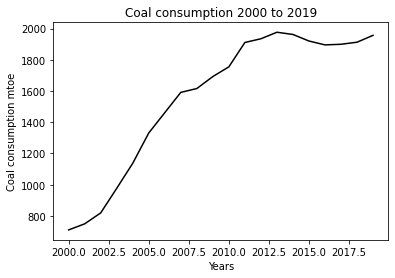

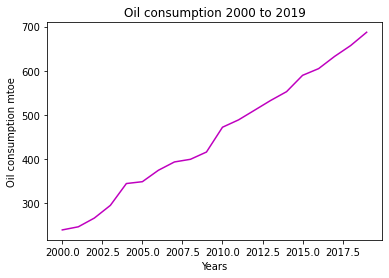

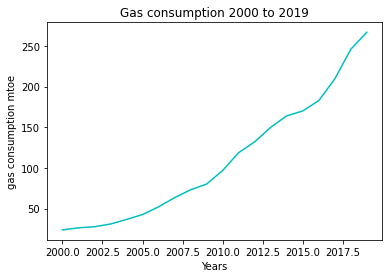

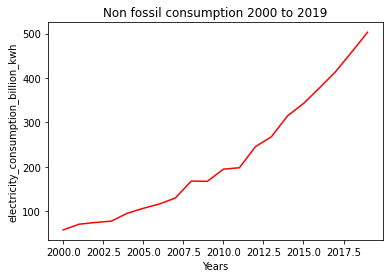

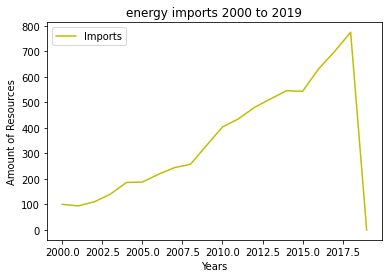

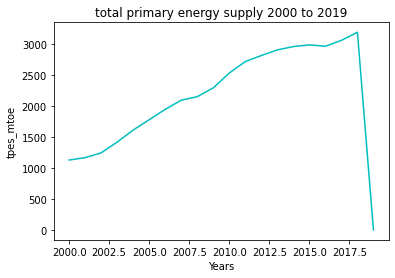

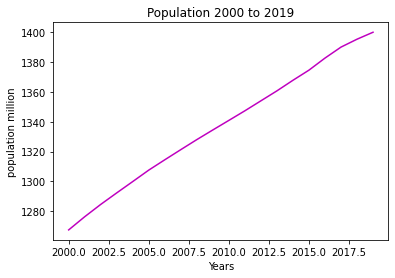

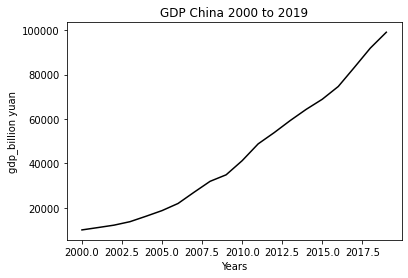

In [ ]:
x = energy_df['year']
y1 = energy_df['total_energy_consumption_mtoe']
y10 = energy_df['coal_consumption_mtoe']
y11 = energy_df['oil_consumption_mtoe']
y12 = energy_df['gas_consumption_mtoe']
y13 = energy_df['non_fossil_consumption_mtoe']
y3 = energy_df['imports_mtoe']
y5 = energy_df['tpes_mtoe']
y6 = energy_df['population_million']
y7 = energy_df['gdp_billion_yuan']

plt.figure()
plt.title("Coal consumption 2000 to 2019")
plt.plot(x, y10, 'k-')
plt.xlabel("Years")
plt.ylabel("Coal consumption mtoe")

plt.figure()
plt.title("Oil consumption 2000 to 2019")
plt.plot(x, y11, 'm-')
plt.xlabel("Years")
plt.ylabel("Oil consumption mtoe")

plt.figure()
plt.title("Gas consumption 2000 to 2019")
plt.plot(x, y12, 'c-')
plt.xlabel("Years")
plt.ylabel("gas consumption mtoe")

plt.figure()
plt.title("Non fossil consumption 2000 to 2019")
plt.plot(x, y13, 'r-')
plt.xlabel("Years")
plt.ylabel("electricity_consumption_billion_kwh")
plt.figure()
plt.title("energy imports 2000 to 2019")
plt.plot(x, y3, 'y-')
plt.legend(["Imports", "Exports"], loc="upper left")
plt.xlabel("Years")
plt.ylabel("Amount of Resources")

plt.figure()
plt.title("total primary energy supply 2000 to 2019")
plt.plot(x, y5, 'c-')
plt.xlabel("Years")
plt.ylabel("tpes_mtoe")

plt.figure()
plt.title("Population 2000 to 2019")
plt.plot(x, y6, 'm-')
plt.xlabel("Years")
plt.ylabel("population million")

plt.figure()
plt.title("GDP China 2000 to 2019")
plt.plot(x, y7, 'k-')
plt.xlabel("Years")
plt.ylabel("gdp_billion yuan")

plt.show()

Comment: Some of the plots showed abnormal drops since there were missing values in the dataset which displayed as 0. 

**Deutsch:**

Kommentar: Einige der Grafiken zeigten abnormale Absenkungen, da es fehlende Werte im Datensatz gab, die als 0 angezeigt wurden. 

**Arrange the columns**

Shifting the ***year*** column to the last column and adding a new column ***prediction*** into the energy_df

**Deutsch:**

**Anordnen der Spalten**

Verschieben der **Jahres**-Spalte in die letzte Spalte und Hinzufügung einer neuen **Vorhersage**-spalte in der energy_df

In [ ]:
features = ['total_energy_consumption_mtoe', 'coal_consumption_mtoe','oil_consumption_mtoe','gas_consumption_mtoe','non_fossil_consumption_mtoe', 'imports_mtoe','tpes_mtoe', 'population_million', 'gdp_billion_yuan', 'year']
energy_df = energy_df[features]
energy_df_ext = energy_df.copy()
energy_df_ext['prediction'] = energy_df_ext['total_energy_consumption_mtoe']
energy_df_ext.tail()

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year,prediction
15,3038.791,1920.657806,589.578310,170.021712,342.370652,543.865,2991.43,1374.62,68885.82,2015,3038.791
16,3090.444,1895.791743,604.765327,182.775362,377.626286,631.645,2970.86,1382.71,74639.51,2016,3090.444
17,3190.789,1899.784264,632.539516,209.419272,414.000764,700.273,3064.90,1390.08,83203.59,2017,3190.789
18,3303.475,1912.999927,657.073147,245.927287,457.902729,775.509,3196.42,1395.38,91928.11,2018,3303.475
19,3409.000,1956.940885,687.293511,266.938874,502.875047,0.000,0.00,1400.05,99086.51,2019,3409.000


**Check zero values**

**Deutsch:**

**0-werte überprüfen**

In [ ]:
energy_df.isin([0]).sum()

total_energy_consumption_mtoe    0
coal_consumption_mtoe            0
oil_consumption_mtoe             0
gas_consumption_mtoe             0
non_fossil_consumption_mtoe      0
imports_mtoe                     1
tpes_mtoe                        1
population_million               0
gdp_billion_yuan                 0
year                             0
dtype: int64

**Replace the zero values with null**

**Deutsch:**

**Ersetzen Sie die 0-Werte durch Nullwerte**

In [ ]:
cols = ["imports_mtoe","tpes_mtoe"]
energy_df[cols] = energy_df[cols].replace(['0', 0], np.nan)

**Interpolate the missing values by using linear interpolation**

**Deutsch:**

**Interpolierung der fehlenden Werte mit Hilfe der linearen Interpolation**

In [ ]:
energy_df.interpolate(method='linear', limit_direction ='both', inplace=True)

energy_df

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
0,1028.748,710.392047,239.039282,23.653872,57.871406,100.289,1129.87,1267.43,10028.01,2000
1,1088.829,749.393539,246.105247,26.212773,70.767404,94.297,1168.30,1276.27,11086.31,2001
2,1187.039,819.385234,265.905076,27.610780,74.664252,110.383,1245.80,1284.53,12171.74,2002
3,1379.581,976.928527,294.666253,30.876615,77.587512,140.336,1419.64,1292.27,13742.20,2003
4,1611.967,1137.462753,344.207504,36.534898,95.419626,186.151,1614.66,1299.88,16184.02,2004
5,1829.583,1331.468157,348.399466,42.551166,106.521667,187.761,1781.42,1307.56,18731.89,2005
6,2005.269,1461.575517,374.328103,52.054572,116.180339,218.197,1948.77,1314.48,21943.85,2006
7,2180.094,1591.652537,393.148254,63.329630,129.721449,244.328,2097.55,1321.29,27009.23,2007
8,2244.277,1616.135032,399.181491,73.010343,167.889669,257.348,2153.96,1328.02,31924.46,2008
9,2352.882,1692.937022,415.649790,80.065634,167.205705,331.191,2296.88,1334.50,34851.77,2009


**Visualize data of years against each column after interpolation**

**Deutsch:**

**Visualisierung der Daten von Jahren gegenüber jeder Spalte nach der Interpolation**

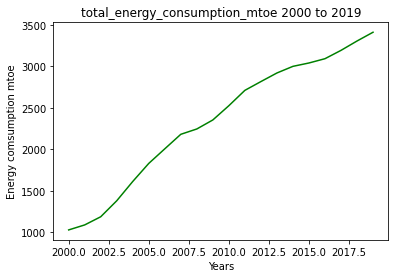

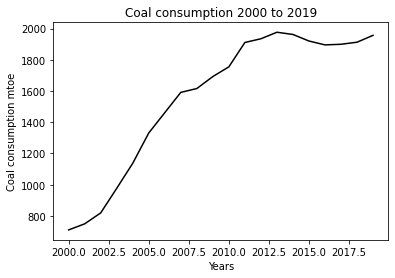

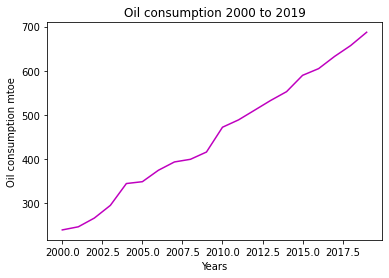

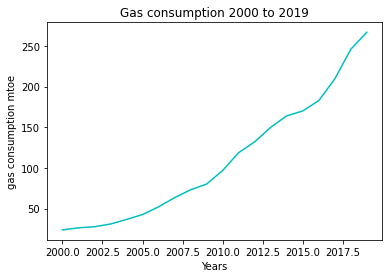

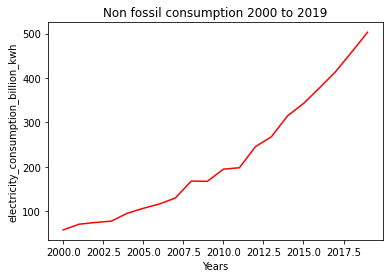

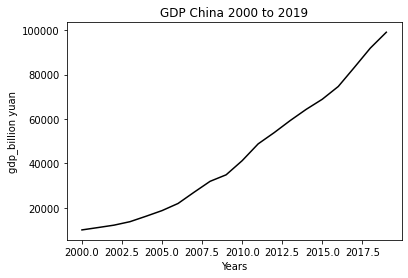

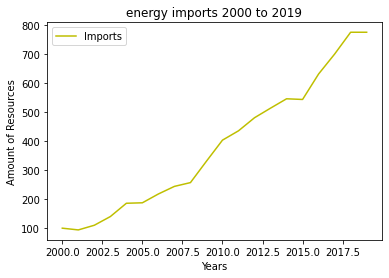

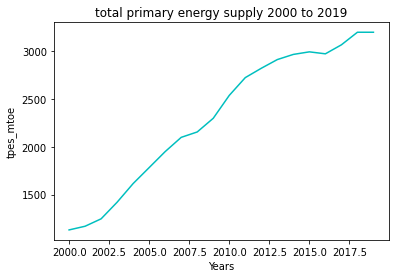

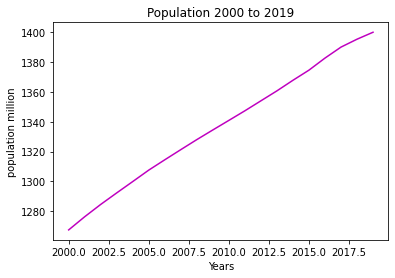

In [ ]:
x = energy_df['year']
y1 = energy_df['total_energy_consumption_mtoe']
y3 = energy_df['imports_mtoe']
y5 = energy_df['tpes_mtoe']
y6 = energy_df['population_million']
y7 = energy_df['gdp_billion_yuan']
y10 = energy_df['coal_consumption_mtoe']
y11 = energy_df['oil_consumption_mtoe']
y12 = energy_df['gas_consumption_mtoe']
y13 = energy_df['non_fossil_consumption_mtoe']

plt.figure()
plt.title("total_energy_consumption_mtoe 2000 to 2019")
plt.plot(x, y1, 'g-')
plt.xlabel("Years")
plt.ylabel("Energy comsumption mtoe")

plt.figure()
plt.title("Coal consumption 2000 to 2019")
plt.plot(x, y10, 'k-')
plt.xlabel("Years")
plt.ylabel("Coal consumption mtoe")

plt.figure()
plt.title("Oil consumption 2000 to 2019")
plt.plot(x, y11, 'm-')
plt.xlabel("Years")
plt.ylabel("Oil consumption mtoe")

plt.figure()
plt.title("Gas consumption 2000 to 2019")
plt.plot(x, y12, 'c-')
plt.xlabel("Years")
plt.ylabel("gas consumption mtoe")

plt.figure()
plt.title("Non fossil consumption 2000 to 2019")
plt.plot(x, y13, 'r-')
plt.xlabel("Years")
plt.ylabel("electricity_consumption_billion_kwh")

plt.figure()
plt.title("GDP China 2000 to 2019")
plt.plot(x, y7, 'k-')
plt.xlabel("Years")
plt.ylabel("gdp_billion yuan")

plt.figure()
plt.title("energy imports 2000 to 2019")
plt.plot(x, y3, 'y-')
plt.legend(["Imports", "Exports"], loc="upper left")
plt.xlabel("Years")
plt.ylabel("Amount of Resources")

plt.figure()
plt.title("total primary energy supply 2000 to 2019")
plt.plot(x, y5, 'c-')
plt.xlabel("Years")
plt.ylabel("tpes_mtoe")

plt.figure()
plt.title("Population 2000 to 2019")
plt.plot(x, y6, 'm-')
plt.xlabel("Years")
plt.ylabel("population million")

plt.show()

**Check Correlations**

**Deutsch:**

**Korrelationen prüfen**

In [ ]:
pearsoncorr = energy_df.corr(method='pearson')
pearsoncorr

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
total_energy_consumption_mtoe,1.000000,0.967508,0.982699,0.930097,0.919665,0.957505,0.997467,0.989195,0.945927,0.987076
coal_consumption_mtoe,0.967508,1.000000,0.905664,0.810540,0.791496,0.857767,0.969404,0.923138,0.835312,0.915922
oil_consumption_mtoe,0.982699,0.905664,1.000000,0.974966,0.971335,0.989107,0.977461,0.996111,0.984272,0.997376
gas_consumption_mtoe,0.930097,0.810540,0.974966,1.000000,0.994796,0.990844,0.923652,0.964301,0.997906,0.971747
non_fossil_consumption_mtoe,0.919665,0.791496,0.971335,0.994796,1.000000,0.984347,0.909204,0.961873,0.994153,0.968318
imports_mtoe,0.957505,0.857767,0.989107,0.990844,0.984347,1.000000,0.954566,0.982123,0.995237,0.986707
tpes_mtoe,0.997467,0.969404,0.977461,0.923652,0.909204,0.954566,1.000000,0.983006,0.940533,0.981646
population_million,0.989195,0.923138,0.996111,0.964301,0.961873,0.982123,0.983006,1.000000,0.976345,0.999361
gdp_billion_yuan,0.945927,0.835312,0.984272,0.997906,0.994153,0.995237,0.940533,0.976345,1.000000,0.982514
year,0.987076,0.915922,0.997376,0.971747,0.968318,0.986707,0.981646,0.999361,0.982514,1.000000


**Correlation Matrix**

**Deutsch:**

**Korrelations-Matrix**

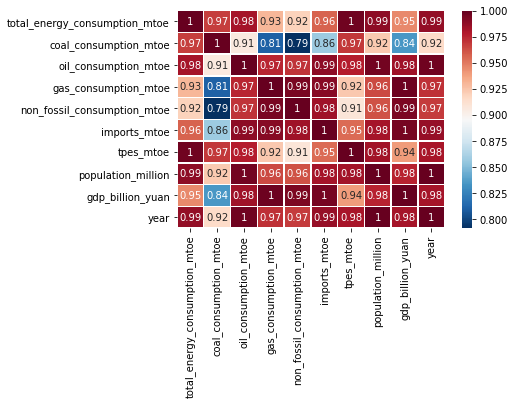

In [ ]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

**Calculation of P-value**

**Deutsch:**

**Berechnung vom P-Wert**

In [ ]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 12)
    return pvalues

In [ ]:
calculate_pvalues(energy_df)

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
total_energy_consumption_mtoe,0,3e-12,0,2.932e-09,9.861e-09,3.7e-11,0,0,3.08e-10,0
coal_consumption_mtoe,3e-12,0,3.9734e-08,1.46788e-05,3.22569e-05,1.33449e-06,2e-12,6.712e-09,4.57921e-06,1.4652e-08
oil_consumption_mtoe,0,3.9734e-08,0,0,1e-12,0,0,0,0,0
gas_consumption_mtoe,2.932e-09,1.46788e-05,0,0,0,0,6.33e-09,8e-12,0,1e-12
non_fossil_consumption_mtoe,9.861e-09,3.22569e-05,1e-12,0,0,0,2.8538e-08,1.4e-11,0,3e-12
imports_mtoe,3.7e-11,1.33449e-06,0,0,0,0,6.6e-11,0,0,0
tpes_mtoe,0,2e-12,0,6.33e-09,2.8538e-08,6.6e-11,0,0,7.11e-10,0
population_million,0,6.712e-09,0,8e-12,1.4e-11,0,0,0,0,0
gdp_billion_yuan,3.08e-10,4.57921e-06,0,0,0,0,7.11e-10,0,0,0
year,0,1.4652e-08,0,1e-12,3e-12,0,0,0,0,0


All the values are with a  p-value < 0.01, the variables are statistically significant and the null hypothese can be rejected

**Deutsch:**

Alle Werte wurden mit dem P-Wert < 0,01 berechnet. Dieses Variablen waren statistisch signifikant und die Nullhypothese lässt sich ablehnen.

**Create a new DataFrame without exports_mtoe and year**

**Deutsch:**

**Erstellung eines neuen DataFrames ohne exports_mtoe und Jahr**

In [ ]:
input_df = energy_df[['total_energy_consumption_mtoe','coal_consumption_mtoe','oil_consumption_mtoe','gas_consumption_mtoe','non_fossil_consumption_mtoe','imports_mtoe', 'tpes_mtoe', 'population_million', 'gdp_billion_yuan']]

In [ ]:
input_df

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan
0,1028.748,710.392047,239.039282,23.653872,57.871406,100.289,1129.87,1267.43,10028.01
1,1088.829,749.393539,246.105247,26.212773,70.767404,94.297,1168.30,1276.27,11086.31
2,1187.039,819.385234,265.905076,27.610780,74.664252,110.383,1245.80,1284.53,12171.74
3,1379.581,976.928527,294.666253,30.876615,77.587512,140.336,1419.64,1292.27,13742.20
4,1611.967,1137.462753,344.207504,36.534898,95.419626,186.151,1614.66,1299.88,16184.02
5,1829.583,1331.468157,348.399466,42.551166,106.521667,187.761,1781.42,1307.56,18731.89
6,2005.269,1461.575517,374.328103,52.054572,116.180339,218.197,1948.77,1314.48,21943.85
7,2180.094,1591.652537,393.148254,63.329630,129.721449,244.328,2097.55,1321.29,27009.23
8,2244.277,1616.135032,399.181491,73.010343,167.889669,257.348,2153.96,1328.02,31924.46
9,2352.882,1692.937022,415.649790,80.065634,167.205705,331.191,2296.88,1334.50,34851.77


**Display our feature column: total_energy_consumption_mtoe**

**Deutsch:**

**Feature-Spalte anzeigen: total_energy_consumption_mtoe**

In [ ]:
input_df.iloc[:,0]

0     1028.748
1     1088.829
2     1187.039
3     1379.581
4     1611.967
5     1829.583
6     2005.269
7     2180.094
8     2244.277
9     2352.882
10    2524.536
11    2709.301
12    2814.966
13    2918.391
14    2998.338
15    3038.791
16    3090.444
17    3190.789
18    3303.475
19    3409.000
Name: total_energy_consumption_mtoe, dtype: float64

**Basic Statistics**

**Deutsch:**

**Basis-Statistik**

In [ ]:
input_df.describe()

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2345.315000,1560.725139,452.387309,109.615333,218.923141,383.882450,2311.524500,1336.995500,44146.680000
std,777.438682,447.693381,140.879585,76.915808,139.513787,228.411878,721.742988,41.038114,28823.738016
min,1028.748000,710.392047,239.039282,23.653872,57.871406,94.297000,1129.870000,1267.430000,10028.010000
25%,1775.179000,1282.966806,347.351476,41.047099,103.746156,187.358500,1739.730000,1305.640000,18094.922500
50%,2438.709000,1724.056980,443.774366,88.385533,181.245720,367.444000,2416.540000,1337.705000,38031.850000
75%,3008.451250,1914.914397,561.813634,165.517202,321.467192,544.446000,2966.210000,1369.520000,65488.687500
max,3409.000000,1976.844837,687.293511,266.938874,502.875047,775.509000,3196.420000,1400.050000,99086.510000


**Feature Scaling: Min Max Scaling**

**Deutsch:**

**Feature-Skalierung: Min Max Scaling**

In [ ]:
# Calculate the number of rows in the data
nrows = input_df.shape[0]
input_df_unscaled = np.array(input_df)
input_df_unscaled = np.reshape(input_df_unscaled, (nrows, -1))
print(input_df_unscaled.shape)

#Feature Scaling
# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
final_df = scaler.fit_transform(input_df_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_prediction = MinMaxScaler()
#consumption_df = pd.DataFrame(energy_df_ext['total_energy_consumption_mtoe'])
consumption_df = pd.DataFrame(energy_df[['total_energy_consumption_mtoe','coal_consumption_mtoe','oil_consumption_mtoe','gas_consumption_mtoe','non_fossil_consumption_mtoe','imports_mtoe', 'tpes_mtoe', 'population_million', 'gdp_billion_yuan']])
consumption_df_scaled = scaler_prediction.fit_transform(consumption_df)

(20, 9)


In [ ]:
final_df[:,0]

array([0.        , 0.02524145, 0.06650178, 0.14739322, 0.24502406,
       0.33644967, 0.4102595 , 0.48370761, 0.5106724 , 0.55629992,
       0.62841581, 0.70603995, 0.75043231, 0.79388359, 0.82747121,
       0.84446647, 0.86616711, 0.90832441, 0.95566646, 1.        ])

**Convert into a supervised learning problem**

**Deutsch:**

**In ein Format* des überwachten Lernens umwandeln**

In [ ]:
###
*    Dieser Teil des Codes geändert aus dem ipynb-Dokument von JonJae:
*    Titel: FeedInMngmt_LSTM_NN
*    Autor: JonJae
*    Datum: 2020
*    Verfügbarkeit: https://github.com/JonJae/TimeSeriesPrediction_FeedInMngmt/blob/main/FeedInMngmt_LSTM_NN.ipynb
*   (Quelle: https://github.com/JonJae/TimeSeriesPrediction_FeedInMngmt/blob/main/FeedInMngmt_LSTM_NN.ipynb abgerufen am Februar 2021)
###

#Global Settings
sequence_length = 3   # Number of past years that we want to predict the future values
n_out = 1            # Number of years that we wamt to forecast into the future

# Split the training data into x_train and y_train data sets
# Get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(final_df.shape[0] * 0.8) #16 train data point

# Create the training data
train_data = final_df[0:train_data_len, :]
X_train, y_train = [], []
in_start = 0
# step over the entire history five time step at a time
for _ in range(train_data_len):
	# define the end of the input sequence
	in_end = in_start + sequence_length
	out_end = in_end + n_out
	# ensure we have enough data for this instance
	if out_end <= len(train_data):
		X_train.append(train_data[in_start:in_end, :])
		y_train.append(train_data[in_end:out_end, :])
	# move along one batch
	in_start += 1
    
# Convert the X_train and y_train into numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Create the test data
test_data = final_df[train_data_len - sequence_length:, :]

# Seperate the test data into X_test and y_test
X_test, y_test = [], []
test_data_len = test_data.shape[0]
in_start = 0
# step over the entire history five time step at a time
for _ in range(test_data_len):
	# define the end of the input sequence
	in_end = in_start + sequence_length
	out_end = in_end + n_out
	# ensure we have enough data for this instance
	if out_end <= len(test_data):
		X_test.append(test_data[in_start:in_end, :])
		y_test.append(test_data[in_end:out_end, :])
	# move along one batch
	in_start += 1

X_test, y_test = np.array(X_test), np.array(y_test)

# Convert the X_train and y_train to numpy arrays
X_test = np.array(X_test); y_test = np.array(y_test)
    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13, 3, 9) (13, 1, 9)
(4, 3, 9) (4, 1, 9)


**Take a look on test and train data after transformation**

**Deutsch:**

**Schauen wir nun, wie die Training- und Testdaten nach der Transformation aussiehen.**

In [ ]:
X_train

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00879609, 0.        , 0.        , 0.        ],
        [0.02524145, 0.03079585, 0.0157633 , 0.01051812, 0.02897953,
         0.        , 0.01859621, 0.06665661, 0.0118832 ],
        [0.06650178, 0.08606178, 0.05993428, 0.01626449, 0.03773642,
         0.02361379, 0.05609833, 0.12893983, 0.02407103]],

       [[0.02524145, 0.03079585, 0.0157633 , 0.01051812, 0.02897953,
         0.        , 0.01859621, 0.06665661, 0.0118832 ],
        [0.06650178, 0.08606178, 0.05993428, 0.01626449, 0.03773642,
         0.02361379, 0.05609833, 0.12893983, 0.02407103],
        [0.14739322, 0.21045907, 0.12409692, 0.0296884 , 0.04430549,
         0.06758395, 0.14021921, 0.18730207, 0.04170506]],

       [[0.06650178, 0.08606178, 0.05993428, 0.01626449, 0.03773642,
         0.02361379, 0.05609833, 0.12893983, 0.02407103],
        [0.14739322, 0.21045907, 0.12409692, 0.0296884 , 0.04430549,
         0.06758395, 0.14021921, 0.187

In [ ]:
y_train

array([[[0.14739322, 0.21045907, 0.12409692, 0.0296884 , 0.04430549,
         0.06758395, 0.14021921, 0.18730207, 0.04170506]],

       [[0.24502406, 0.33721802, 0.23461735, 0.05294624, 0.08437733,
         0.13483908, 0.23458905, 0.24468406, 0.06912322]],

       [[0.33644967, 0.49040605, 0.24396911, 0.07767554, 0.10932553,
         0.13720252, 0.31528393, 0.30259388, 0.09773216]],

       [[0.4102595 , 0.59313973, 0.3018127 , 0.11673839, 0.13103024,
         0.1818817 , 0.39626431, 0.35477304, 0.1337979 ]],

       [[0.48370761, 0.69584946, 0.34379814, 0.16308345, 0.16145945,
         0.22024128, 0.46825869, 0.40612276, 0.19067489]],

       [[0.5106724 , 0.71518101, 0.35725755, 0.20287511, 0.24723003,
         0.23935427, 0.49555539, 0.45686925, 0.24586592]],

       [[0.55629992, 0.7758244 , 0.3939963 , 0.23187521, 0.24569304,
         0.34775371, 0.56471414, 0.50573066, 0.27873544]],

       [[0.62841581, 0.82496947, 0.51948124, 0.30027153, 0.30725673,
         0.45419047, 0.68052

In [ ]:
X_test

array([[[0.79388359, 1.        , 0.6545798 , 0.5190226 , 0.47148425,
         0.61602409, 0.86176478, 0.7034384 , 0.55321289],
        [0.82747121, 0.98877601, 0.69942332, 0.57694402, 0.57668734,
         0.66336471, 0.88785173, 0.75697482, 0.61002936],
        [0.84446647, 0.95563433, 0.78200942, 0.60163117, 0.63931892,
         0.65995314, 0.90080569, 0.80824913, 0.6608893 ]],

       [[0.82747121, 0.98877601, 0.69942332, 0.57694402, 0.57668734,
         0.66336471, 0.88785173, 0.75697482, 0.61002936],
        [0.84446647, 0.95563433, 0.78200942, 0.60163117, 0.63931892,
         0.65995314, 0.90080569, 0.80824913, 0.6608893 ],
        [0.86616711, 0.93599991, 0.81588978, 0.65405384, 0.71854441,
         0.78881171, 0.8908519 , 0.86925049, 0.72549504]],

       [[0.84446647, 0.95563433, 0.78200942, 0.60163117, 0.63931892,
         0.65995314, 0.90080569, 0.80824913, 0.6608893 ],
        [0.86616711, 0.93599991, 0.81588978, 0.65405384, 0.71854441,
         0.78881171, 0.8908519 , 0.869

In [ ]:
X_test

array([[[0.79388359, 1.        , 0.6545798 , 0.5190226 , 0.47148425,
         0.61602409, 0.86176478, 0.7034384 , 0.55321289],
        [0.82747121, 0.98877601, 0.69942332, 0.57694402, 0.57668734,
         0.66336471, 0.88785173, 0.75697482, 0.61002936],
        [0.84446647, 0.95563433, 0.78200942, 0.60163117, 0.63931892,
         0.65995314, 0.90080569, 0.80824913, 0.6608893 ]],

       [[0.82747121, 0.98877601, 0.69942332, 0.57694402, 0.57668734,
         0.66336471, 0.88785173, 0.75697482, 0.61002936],
        [0.84446647, 0.95563433, 0.78200942, 0.60163117, 0.63931892,
         0.65995314, 0.90080569, 0.80824913, 0.6608893 ],
        [0.86616711, 0.93599991, 0.81588978, 0.65405384, 0.71854441,
         0.78881171, 0.8908519 , 0.86925049, 0.72549504]],

       [[0.84446647, 0.95563433, 0.78200942, 0.60163117, 0.63931892,
         0.65995314, 0.90080569, 0.80824913, 0.6608893 ],
        [0.86616711, 0.93599991, 0.81588978, 0.65405384, 0.71854441,
         0.78881171, 0.8908519 , 0.869

**Let's see how y_test looks like**

**Deutsch:**

**Schauen wir uns an, wie y_test aussieht**

In [ ]:
y_test

array([[[0.86616711, 0.93599991, 0.81588978, 0.65405384, 0.71854441,
         0.78881171, 0.8908519 , 0.86925049, 0.72549504]],

       [[0.90832441, 0.93915243, 0.87785058, 0.76357111, 0.80028414,
         0.88955567, 0.9363577 , 0.9248228 , 0.82165745]],

       [[0.95566646, 0.94958761, 0.93258209, 0.91363386, 0.89893944,
         1.        , 1.        , 0.96478661, 0.91962137]],

       [[1.        , 0.9842837 , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        ]]])

**Change the shape of the training dataset to suit the MLP Model's input dimension**

**Deutsch:**

**Änderung der Form des Trainingsdatensatzes zur Anpassung an die Eingangsdimension des MLP-Modells**

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train1 = X_train.reshape((X_train.shape[0], n_input))
# flatten output
n_output = y_train.shape[1] * y_train.shape[2]
y_train1 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
# flatten input
n_input1 = X_test.shape[1] * X_test.shape[2]
X_test1 = X_test.reshape((X_test.shape[0], n_input1))
# flatten output
n_output1 = y_test.shape[1] * y_test.shape[2]
y_test1 = y_test.reshape((y_test.shape[0], n_output1))

**Build the MLP-Model**

**Deutsch:**

**Aufbau des MLP-Modells**

In [ ]:
# set the denominator of mape function permanently as 1 to ensure mathematical operation error free  
set_epsilon(1)

# define model
model_2=Sequential()

# Custom fuction of root mean square error
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# Initializing the Neural Network based on multilayered-perceptron 
# Adding 1st dense layer
model_2.add(Dense(units=70, input_dim=n_input, activation='tanh')) #input_shape=(X_train1.shape[1], X_train1.shape[2])
model_2.add(Dropout(0.2))

# Adding a hidden dense layer
model_2.add(Dense(units=50, activation='relu'))

# Adding Dropout
model_2.add(Dropout(0.2))

#model_2.add(Dense(30))

# Output layer
model_2.add(Dense(n_output))

# Compiling the Neural Network
model_2.compile(optimizer=Adam(learning_rate=0.0002), loss=rmse, metrics='mean_absolute_percentage_error')

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                1960      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 459       
Total params: 5,969
Trainable params: 5,969
Non-trainable params: 0
_________________________________________________________________


**Start training with max 2000 epochs**

**Deutsch:**

**Training mit max. 2000 Epochen**

In [ ]:
epochs = 2000
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60, restore_best_weights=True)
history_2 = model_2.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), batch_size=2, 
                    epochs=epochs, callbacks=[early_stop], shuffle=False)

Epoch 1/2000
7/7 [==============================] - 1s 72ms/step - loss: 0.4309 - mean_absolute_percentage_error: 35.5498 - val_loss: 0.9791 - val_mean_absolute_percentage_error: 91.1063
Epoch 2/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.3945 - mean_absolute_percentage_error: 32.7938 - val_loss: 0.9221 - val_mean_absolute_percentage_error: 85.7990
Epoch 3/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.3673 - mean_absolute_percentage_error: 29.5668 - val_loss: 0.8697 - val_mean_absolute_percentage_error: 80.7733
Epoch 4/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.3303 - mean_absolute_percentage_error: 26.6655 - val_loss: 0.8201 - val_mean_absolute_percentage_error: 75.8480
Epoch 5/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.3390 - mean_absolute_percentage_error: 27.0631 - val_loss: 0.7711 - val_mean_absolute_percentage_error: 70.8282
Epoch 6/2000
7/7 [==============================] - 0s 8ms/step - los

**Performance plot of the model: RMSE and MAPE**

**Deutsch:**

**Erstellung des Diagramms der Modellleistung: RMSE und MAPE**

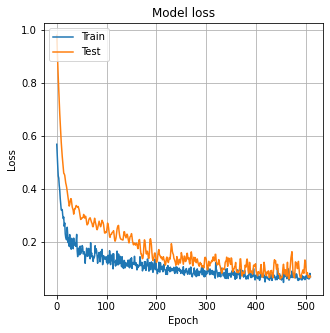

In [ ]:
 # Plot training & validation loss values (RMSE)
fig, ax = plt.subplots(figsize=(5, 5), sharex=True)
plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

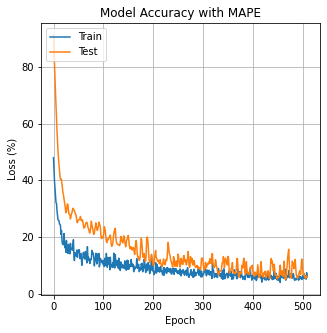

In [ ]:
# Plot tht training and validation's MAPE
fig, ax = plt.subplots(figsize=(5, 5), sharex=True)
plt.plot(history_2.history["mean_absolute_percentage_error"])
plt.plot(history_2.history["val_mean_absolute_percentage_error"])
plt.title("Model Accuracy with MAPE")
plt.ylabel("Loss (%)")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

**Predict the train dataset for loss calculation**

**Deutsch:**

**Vorhersage des Trainingdatensatzes für die Verlustberechnung**

In [ ]:
predictions_train = model_2.predict(X_train1)
predictions_train

array([[0.15720166, 0.21011545, 0.1428127 , 0.03516841, 0.05338756,
        0.07125772, 0.1336456 , 0.18777221, 0.04010369],
       [0.2357703 , 0.3258315 , 0.21984334, 0.05899353, 0.08855635,
        0.11736758, 0.22701849, 0.24007969, 0.08727522],
       [0.32528967, 0.452354  , 0.26759776, 0.09384446, 0.11468859,
        0.15857968, 0.304339  , 0.2903267 , 0.11206608],
       [0.39082867, 0.5551616 , 0.29245907, 0.13460043, 0.1442965 ,
        0.20567116, 0.38200027, 0.33222866, 0.14644876],
       [0.46451613, 0.6619545 , 0.34731573, 0.1706256 , 0.18317702,
        0.26232058, 0.47603077, 0.39367706, 0.19222131],
       [0.52271736, 0.7452615 , 0.39442354, 0.22262526, 0.22467183,
        0.31440604, 0.5519922 , 0.4521854 , 0.23686096],
       [0.54799354, 0.75602955, 0.42615065, 0.26044747, 0.26748443,
        0.35689935, 0.58840775, 0.4940086 , 0.29174384],
       [0.6108233 , 0.8028519 , 0.49438274, 0.30995664, 0.31496716,
        0.41599074, 0.65087825, 0.5492535 , 0.34900412],


In [ ]:
prediction_unscaled_train = scaler_prediction.inverse_transform(predictions_train)

predicted_train_df = pd.DataFrame(prediction_unscaled_train, columns = ['total_energy_consumption_mtoe','coal_consumption_mtoe','oil_consumption_mtoe','gas_consumption_mtoe','non_fossil_consumption_mtoe','imports_mtoe', 'tpes_mtoe', 'population_million', 'gdp_billion_yuan'])
predicted_train_df['year'] = [x for x in range(2003, 2016)]
predicted_train_df

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
0,1402.927612,976.493347,303.055695,32.209820,81.629059,142.838623,1406.055298,1292.332275,13599.583984,2003
1,1589.940796,1123.042236,337.584991,38.006111,97.279305,174.249207,1599.015015,1299.269409,17800.609375,2004
2,1803.019409,1283.277100,358.991119,46.484821,108.908249,202.323395,1758.801758,1305.933228,20008.447266,2005
3,1959.018799,1413.477905,370.135284,56.400139,122.083878,234.402679,1919.292603,1311.490234,23070.517578,2006
4,2134.413574,1548.726196,394.725037,65.164520,139.385849,272.992950,2113.611328,1319.639404,27146.953125,2007
5,2272.947021,1654.230591,415.841309,77.815262,157.851181,308.474182,2270.589600,1327.398926,31122.492188,2008
6,2333.110840,1667.867798,430.063110,87.016838,176.902954,337.421143,2345.844238,1332.945312,36010.281250,2009
7,2482.661133,1727.166016,460.648468,99.061676,198.032944,377.674866,2474.942383,1340.271973,41109.792969,2010
8,2618.720947,1819.322876,497.912689,116.919174,230.102905,426.500977,2632.222656,1349.252686,46206.644531,2011
9,2767.717285,1903.200439,518.219116,129.133957,245.656433,468.896790,2765.164307,1355.734375,48518.496094,2012


**Predict the test dataset for loss calculation**

**Deutsch:**

**Vorhersage des Testdatensatzes für die Verlustberechnung**

In [ ]:
# predict the test data which is from 2016 to 2019
x_input = X_test.reshape((-1, n_input))
predictions = model_2.predict(x_input)
predictions

array([[0.91130126, 1.011496  , 0.8341849 , 0.6575167 , 0.6575278 ,
        0.7799767 , 0.9665311 , 0.8514225 , 0.7137654 ],
       [0.9416069 , 1.0072162 , 0.87636244, 0.71541566, 0.7230076 ,
        0.82683134, 0.9829376 , 0.8819241 , 0.7977273 ],
       [0.98831475, 1.0358753 , 0.9257636 , 0.8052569 , 0.797456  ,
        0.90505004, 1.0336077 , 0.92347026, 0.86944455],
       [1.0389563 , 1.057453  , 0.9813356 , 0.8739498 , 0.86771095,
        0.9802561 , 1.0836877 , 0.95893323, 0.9197572 ]], dtype=float32)

In [ ]:
# convert back the predicted value to original format
prediction_unscaled_test = scaler_prediction.inverse_transform(predictions)

# arrange the valus in a dataframe
predicted_test_df = pd.DataFrame(prediction_unscaled_test, columns = ['total_energy_consumption_mtoe','coal_consumption_mtoe','oil_consumption_mtoe','gas_consumption_mtoe','non_fossil_consumption_mtoe','imports_mtoe', 'tpes_mtoe', 'population_million', 'gdp_billion_yuan'])
predicted_test_df['year'] = [x for x in range(2016, 2020)]
predicted_test_df

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
0,3197.874512,1991.403809,612.966187,183.617828,350.473663,625.626526,3127.254883,1380.345581,73594.882812,2016
1,3270.009521,1985.983765,631.872498,197.703766,379.612427,657.544434,3161.159668,1384.390747,81072.406250,2017
2,3381.186035,2022.279175,654.016785,219.560791,412.742249,710.827942,3265.872070,1389.900635,87459.437500,2018
3,3501.725586,2049.606445,678.927124,236.272751,444.005920,762.059204,3369.364746,1394.603638,91940.203125,2019


**Calculate loss for testing data**

**Deutsch:**

**Verlustberechnung für Testdaten**


In [ ]:
# create  the functions of mean absolute percentage error (MAPE) and root mean squared error (RMSE)
def mean_absolute_percentage_error(y_true, y_prediction): 
    y_true, y_prediction = np.array(y_true), np.array(y_prediction)
    return np.mean(np.abs((y_true - y_prediction) / y_true)) * 100

def root_mean_squared_error(y_true, y_prediction):
    mse = mean_squared_error(y_true, y_prediction)
    rmse = np.sqrt(mse)
    return rmse

In [ ]:
# create a function of generating all the relevant errors
def calculate_performance(y_true, y_prediction):
    MSE = mean_squared_error(y_true, y_prediction)
    MAE = mean_absolute_error(y_true, y_prediction)
    MAPE = mean_absolute_percentage_error(y_true, y_prediction)
    RMSE = root_mean_squared_error(y_true, y_prediction)
    return round(MSE, 3), round(MAE, 3), round(MAPE, 3), round(RMSE, 3)

In [ ]:
# rearrange the shape of test data's input for  inputing in the model
x_input2 = X_test.reshape((-1, n_input))
actual_arr=input_df.iloc[16:20,:].to_numpy()

# Get the predicted values
predictions = model_2.predict(x_input2)
prediction_unscaled2 = scaler_prediction.inverse_transform(predictions)

MSE, MAE, MAPE, RMSE = calculate_performance(actual_arr, prediction_unscaled2)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 2134044.708
Mean Absolute Error (MAE): 456.333
Mean Absolute Percentage Error (MAPE): 4.17 %
Root Mean Squared Error (RMSE): 1460.837


**Calculate loss of total energy consumption for prediction against actual values** (total energy consumption)

**Deutsch:**

**Verlustberechnung des Gesamtenergieverbrauchs für die Vorhersage gegenüber den tatsächlichen Werten** 

In [ ]:
predicted_tec=predicted_test_df.iloc[:,0].to_numpy()
actual_tec=input_df.iloc[16:20,0].to_numpy()

MSE, MAE, MAPE, RMSE = calculate_performance(actual_tec, predicted_tec)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared  Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 8113.561
Mean Absolute Error (MAE): 89.272
Mean Absolute Percentage Error (MAPE): 2.76 %
Root Mean Squared  Error (RMSE): 90.075


**Plot the curve of predicted values against actual values**

**Deutsch:**

**Aufzeichnung der Kurve der vorhergesagten Werte im Vergleich zu den tatsächlichen Werten**

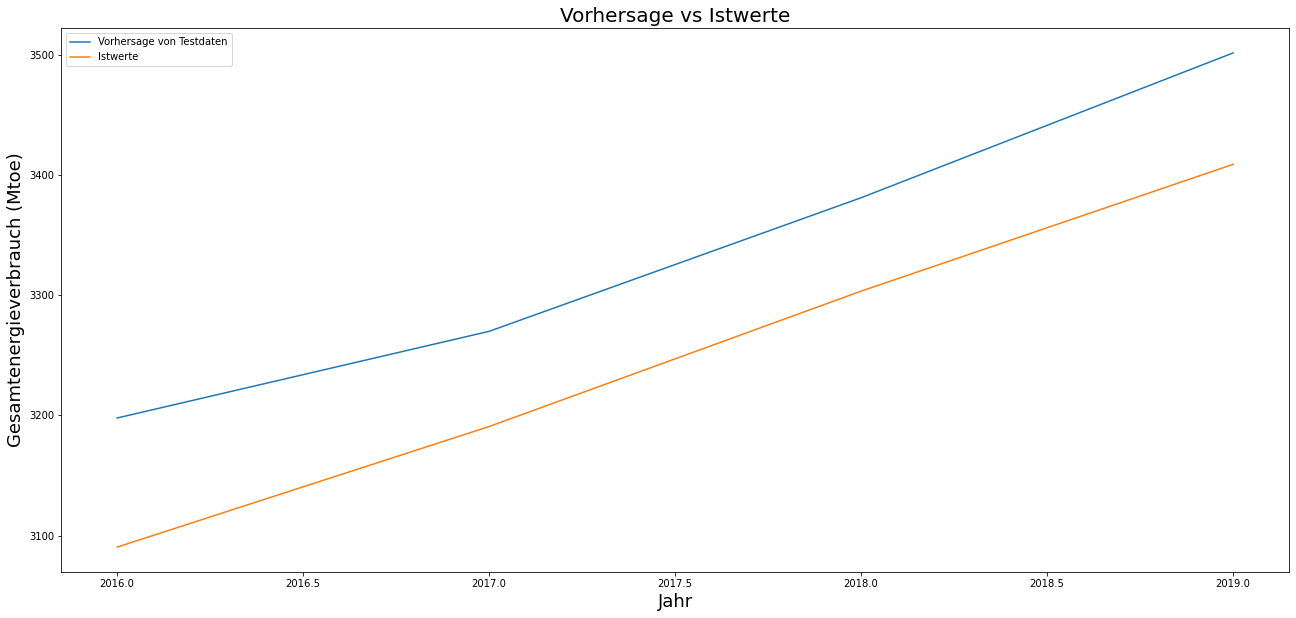

In [ ]:
# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10)) #, sharex=True)
plt.title("Vorhersage vs Istwerte", fontsize=20)
ax1.plot(predicted_test_df.iloc[:,-1], predicted_tec)
ax1.plot(predicted_test_df.iloc[:,-1], actual_tec)
plt.legend(["Vorhersage von Testdaten", "Istwerte"], loc="upper left")
plt.xlabel("Jahr", fontsize=18)
plt.ylabel("Gesamtenergieverbrauch (Mtoe)", fontsize=18)

plt.show()

**Calculate loss of coal consumption for prediction against actual values** (Coal consumption)

**Deutsch:**

**Verlustberechnung des Kohleverbrauchs für die Vorhersage gegenüber den tatsächlichen Werten** 

In [ ]:
predicted_cc=predicted_test_df.iloc[:,1].to_numpy()
actual_cc=input_df.iloc[16:20,1].to_numpy()

MSE, MAE, MAPE, RMSE = calculate_performance(actual_cc, predicted_cc)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared  Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 9275.22
Mean Absolute Error (MAE): 95.939
Mean Absolute Percentage Error (MAPE): 5.01 %
Root Mean Squared  Error (RMSE): 96.308


**Plot the curve of predicted values against actual values**

**Deutsch:**

**Aufzeichnung der Kurve der vorhergesagten Werte im Vergleich zu den tatsächlichen Werten**

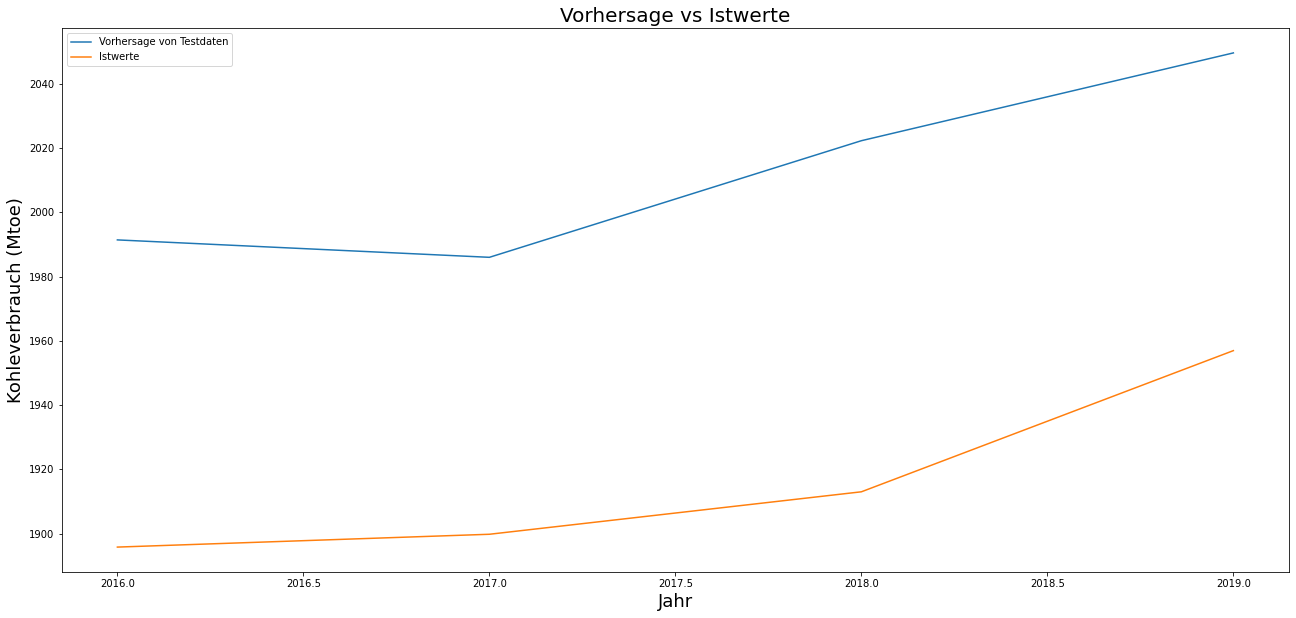

In [ ]:
# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10)) #, sharex=True)
plt.title("Vorhersage vs Istwerte", fontsize=20)
ax1.plot(predicted_test_df.iloc[:,-1], predicted_cc)
ax1.plot(predicted_test_df.iloc[:,-1], actual_cc)
plt.legend(["Vorhersage von Testdaten", "Istwerte"], loc="upper left")
plt.xlabel("Jahr", fontsize=18)
plt.ylabel("Kohleverbrauch (Mtoe)", fontsize=18)

plt.show()

**Calculate loss of oil consumption for prediction against actual values** (Oil consumption)

**Deutsch:**

**Verlustberechnung des Erdölverbrauchs für die Vorhersage gegenüber den tatsächlichen Werten** 

In [ ]:
predicted_oc=predicted_test_df.iloc[:,2].to_numpy()
actual_oc=input_df.iloc[16:20,2].to_numpy()

MSE, MAE, MAPE, RMSE = calculate_performance(actual_oc, predicted_oc)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared  Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 36.759
Mean Absolute Error (MAE): 5.073
Mean Absolute Percentage Error (MAPE): 0.79 %
Root Mean Squared  Error (RMSE): 6.063


**Plot the curve of predicted values against actual values**

**Deutsch:**

**Aufzeichnung der Kurve der vorhergesagten Werte im Vergleich zu den tatsächlichen Werten**

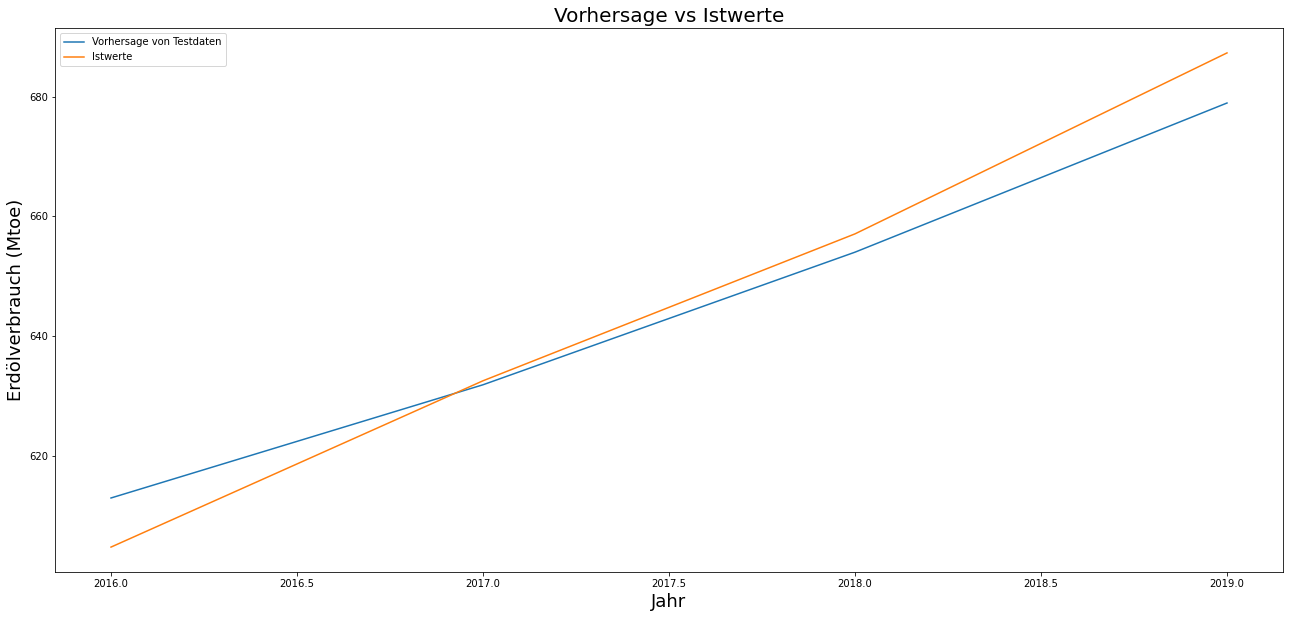

In [ ]:
# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10)) #, sharex=True)
plt.title("Vorhersage vs Istwerte", fontsize=20)
ax1.plot(predicted_test_df.iloc[:,-1], predicted_oc)
ax1.plot(predicted_test_df.iloc[:,-1], actual_oc)
plt.legend(["Vorhersage von Testdaten", "Istwerte"], loc="upper left")
plt.xlabel("Jahr", fontsize=18)
plt.ylabel("Erdölverbrauch (Mtoe)", fontsize=18)

plt.show()

**Calculate loss of natural gas consumption for prediction against actual values** (Natural gas consumption)

**Deutsch:**

**Verlustberechnung des Erdgasverbrauchs für die Vorhersage gegenüber den tatsächlichen Werten** 

In [ ]:
predicted_gc=predicted_test_df.iloc[:,3].to_numpy()
actual_gc=input_df.iloc[16:20,3].to_numpy()

MSE, MAE, MAPE, RMSE = calculate_performance(actual_gc, predicted_gc)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared  Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 443.392
Mean Absolute Error (MAE): 17.398
Mean Absolute Percentage Error (MAPE): 7.07 %
Root Mean Squared  Error (RMSE): 21.057


**Plot the curve of predicted values against actual values**

**Deutsch:**

**Aufzeichnung der Kurve der vorhergesagten Werte im Vergleich zu den tatsächlichen Werten**

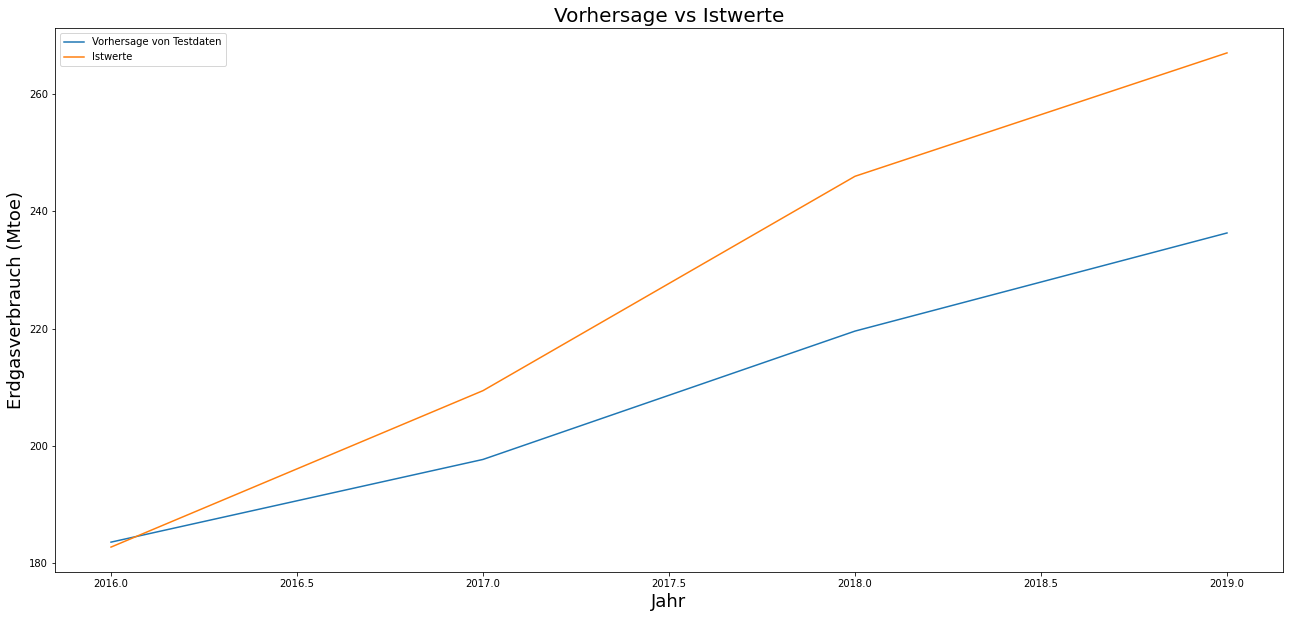

In [ ]:
# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10)) #, sharex=True)
plt.title("Vorhersage vs Istwerte", fontsize=20)
ax1.plot(predicted_test_df.iloc[:,-1], predicted_gc)
ax1.plot(predicted_test_df.iloc[:,-1], actual_gc)
plt.legend(["Vorhersage von Testdaten", "Istwerte"], loc="upper left")
plt.xlabel("Jahr", fontsize=18)
plt.ylabel("Erdgasverbrauch (Mtoe)", fontsize=18)

plt.show()

**Calculate loss of non fossil energy consumption for prediction against actual values** (non fossil energy consumption)

**Deutsch:**

**Verlustberechnung des nichtfossilen Energieverbrauchs für die Vorhersage gegenüber den tatsächlichen Werten** 

In [ ]:
predicted_nfc=predicted_test_df.iloc[:,4].to_numpy()
actual_nfc=input_df.iloc[16:20,4].to_numpy()

MSE, MAE, MAPE, RMSE = calculate_performance(actual_nfc, predicted_nfc)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared  Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 1856.216
Mean Absolute Error (MAE): 41.393
Mean Absolute Percentage Error (MAPE): 9.27 %
Root Mean Squared  Error (RMSE): 43.084


**Plot the curve of predicted values against actual values**

**Deutsch:**

**Aufzeichnung der Kurve der vorhergesagten Werte im Vergleich zu den tatsächlichen Werten**

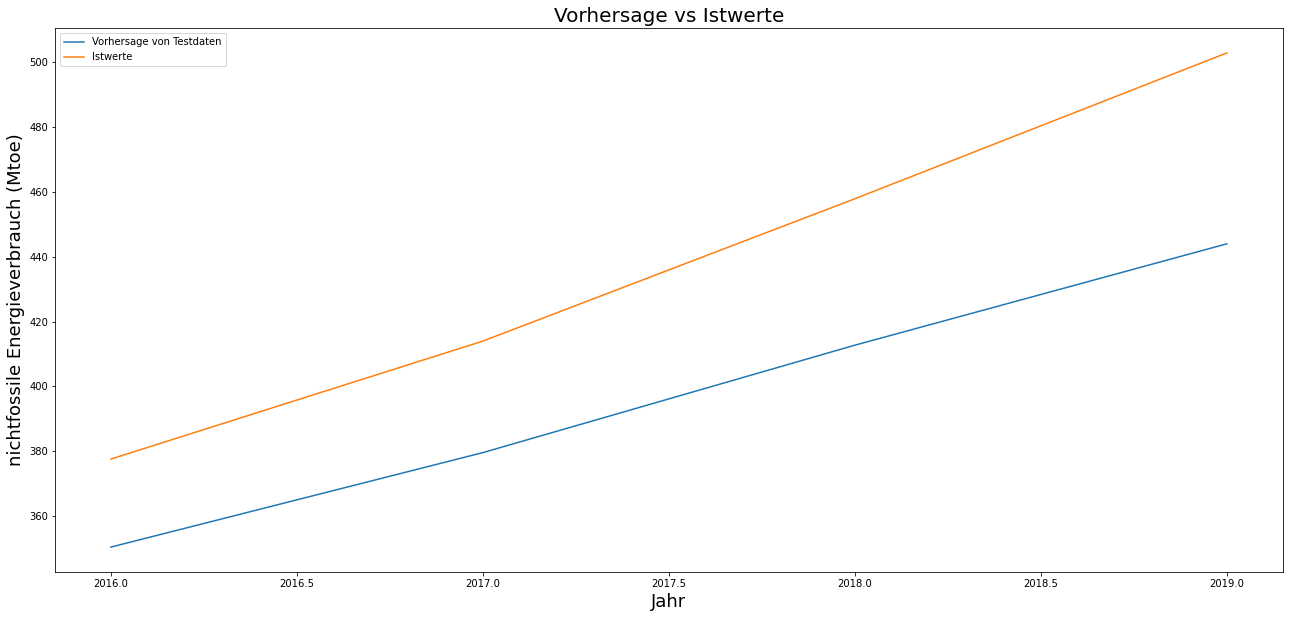

In [ ]:
# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10)) #, sharex=True)
plt.title("Vorhersage vs Istwerte", fontsize=20)
ax1.plot(predicted_test_df.iloc[:,-1], predicted_nfc)
ax1.plot(predicted_test_df.iloc[:,-1], actual_nfc)
plt.legend(["Vorhersage von Testdaten", "Istwerte"], loc="upper left")
plt.xlabel("Jahr", fontsize=18)
plt.ylabel("nichtfossile Energieverbrauch (Mtoe)", fontsize=18)

plt.show()

**Calculate loss of energy imports for prediction against actual values** (energy imports)

**Deutsch:**

**Verlustberechnung der Energieeinfuhr für die Vorhersage gegenüber den tatsächlichen Werten** 

In [ ]:
predicted_imp=predicted_test_df.iloc[:,5].to_numpy()
actual_imp=input_df.iloc[16:20,5].to_numpy()

MSE, MAE, MAPE, RMSE = calculate_performance(actual_imp, predicted_imp)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared  Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 1556.622
Mean Absolute Error (MAE): 31.719
Mean Absolute Percentage Error (MAPE): 4.28 %
Root Mean Squared  Error (RMSE): 39.454


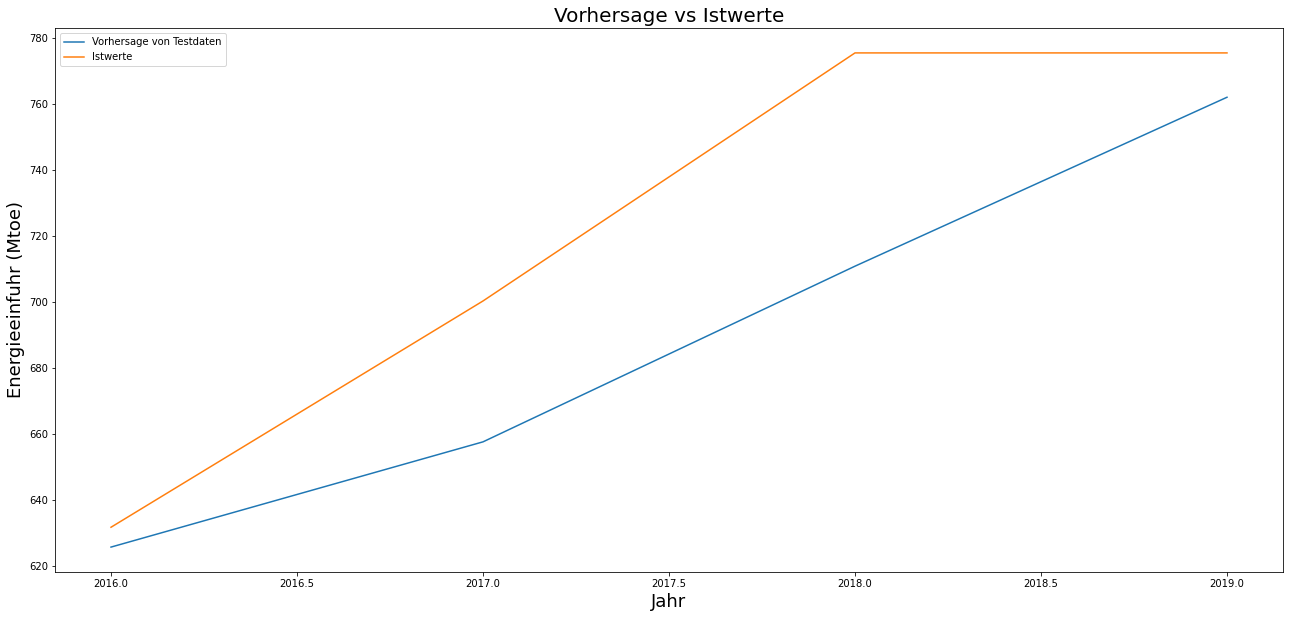

In [ ]:
# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10)) #, sharex=True)
plt.title("Vorhersage vs Istwerte", fontsize=20)
ax1.plot(predicted_test_df.iloc[:,-1], predicted_imp)
ax1.plot(predicted_test_df.iloc[:,-1], actual_imp)
plt.legend(["Vorhersage von Testdaten", "Istwerte"], loc="upper left")
plt.xlabel("Jahr", fontsize=18)
plt.ylabel("Energieeinfuhr (Mtoe)", fontsize=18)

plt.show()

**Calculate loss of tpes for prediction against actual values** (total primary energy supply)

**Deutsch:**

**Verlustberechnung der Gesamtprimärenergieversorgung für die Vorhersage gegenüber den tatsächlichen Werten** 

In [ ]:
predicted_tpes=predicted_test_df.iloc[:,6].to_numpy()
actual_tpes=input_df.iloc[16:20,6].to_numpy()

MSE, MAE, MAPE, RMSE = calculate_performance(actual_tpes, predicted_tpes)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared  Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 17114.69
Mean Absolute Error (MAE): 123.763
Mean Absolute Percentage Error (MAPE): 4.0 %
Root Mean Squared  Error (RMSE): 130.823


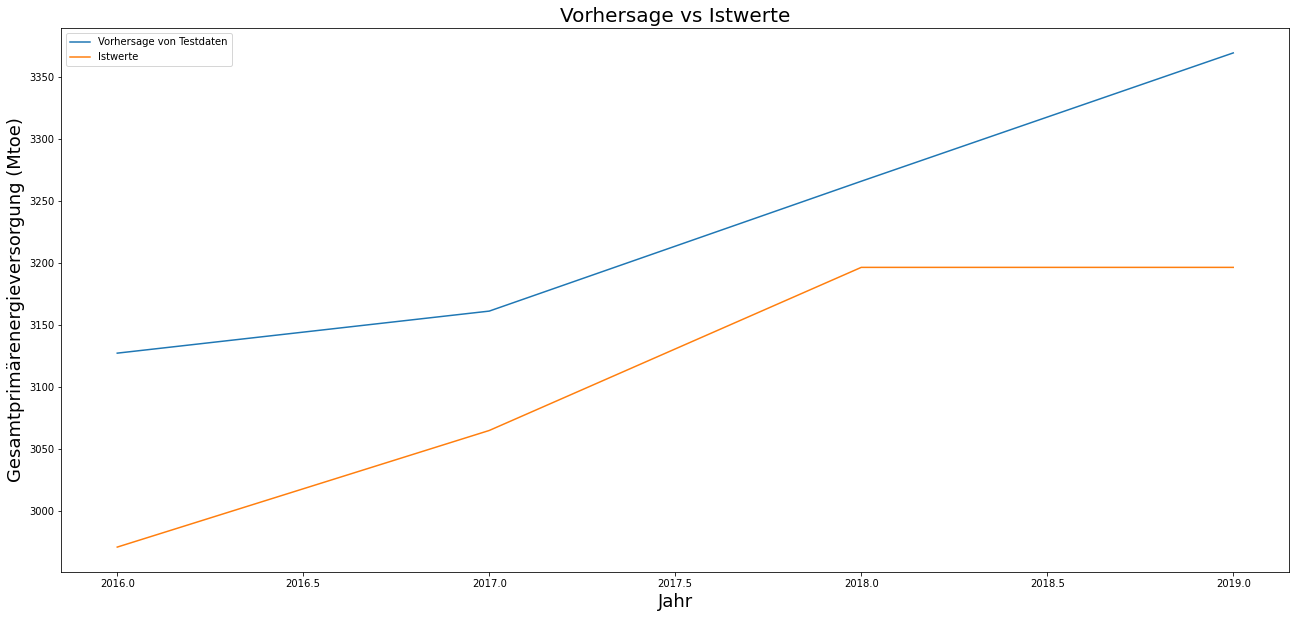

In [ ]:
# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10)) #, sharex=True)
plt.title("Vorhersage vs Istwerte", fontsize=20)
ax1.plot(predicted_test_df.iloc[:,-1], predicted_tpes)
ax1.plot(predicted_test_df.iloc[:,-1], actual_tpes)
plt.legend(["Vorhersage von Testdaten", "Istwerte"], loc="upper left")
plt.xlabel("Jahr", fontsize=18)
plt.ylabel("Gesamtprimärenergieversorgung (Mtoe)", fontsize=18)

plt.show()

**Calculate loss of population for prediction against actual values** (population)

**Deutsch:**

**Verlustberechnung der Bevölkerung für die Vorhersage gegenüber den tatsächlichen Werten** 

In [ ]:
predicted_pop=predicted_test_df.iloc[:,7].to_numpy()
actual_pop=input_df.iloc[16:20,7].to_numpy()

MSE, MAE, MAPE, RMSE = calculate_performance(actual_pop, predicted_pop)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared  Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 24.411
Mean Absolute Error (MAE): 4.745
Mean Absolute Percentage Error (MAPE): 0.34 %
Root Mean Squared  Error (RMSE): 4.941


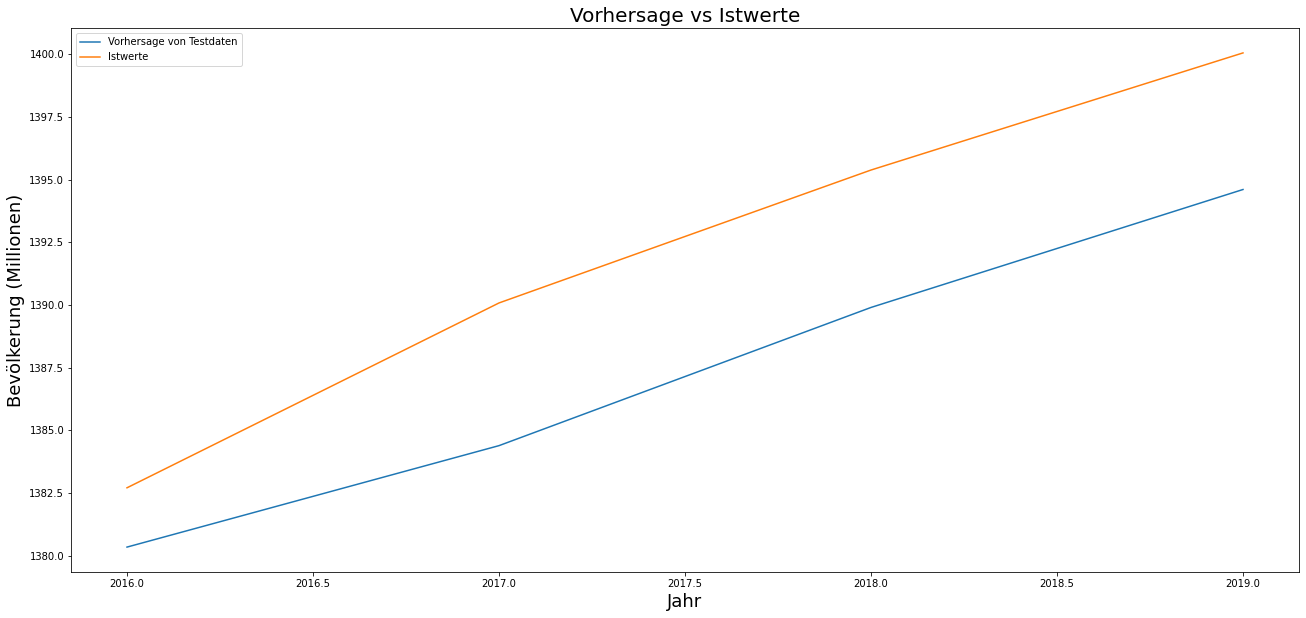

In [ ]:
# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10)) #, sharex=True)
plt.title("Vorhersage vs Istwerte", fontsize=20)
ax1.plot(predicted_test_df.iloc[:,-1], predicted_pop)
ax1.plot(predicted_test_df.iloc[:,-1], actual_pop)
plt.legend(["Vorhersage von Testdaten", "Istwerte"], loc="upper left")
plt.xlabel("Jahr", fontsize=18)
plt.ylabel("Bevölkerung (Millionen)", fontsize=18)

plt.show()

**Calculate loss of GDP for prediction against actual values** (GDP)

**Deutsch:**

**Verlustberechnung des Bruttoinlandsprodukts für die Vorhersage gegenüber den tatsächlichen Werten** 

In [ ]:
predicted_gdp=predicted_test_df.iloc[:,8].to_numpy()
actual_gdp=input_df.iloc[16:20,8].to_numpy()

MSE, MAE, MAPE, RMSE = calculate_performance(actual_gdp, predicted_gdp)
print('Mean Squared Error (MSE): ' + str(MSE))
print('Mean Absolute Error (MAE): ' + str(MAE))
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE,2)) + ' %')
print('Root Mean Squared  Error (RMSE): ' + str(RMSE))

Mean Squared Error (MSE): 19167981.5
Mean Absolute Error (MAE): 3697.698
Mean Absolute Percentage Error (MAPE): 4.01 %
Root Mean Squared  Error (RMSE): 4378.125


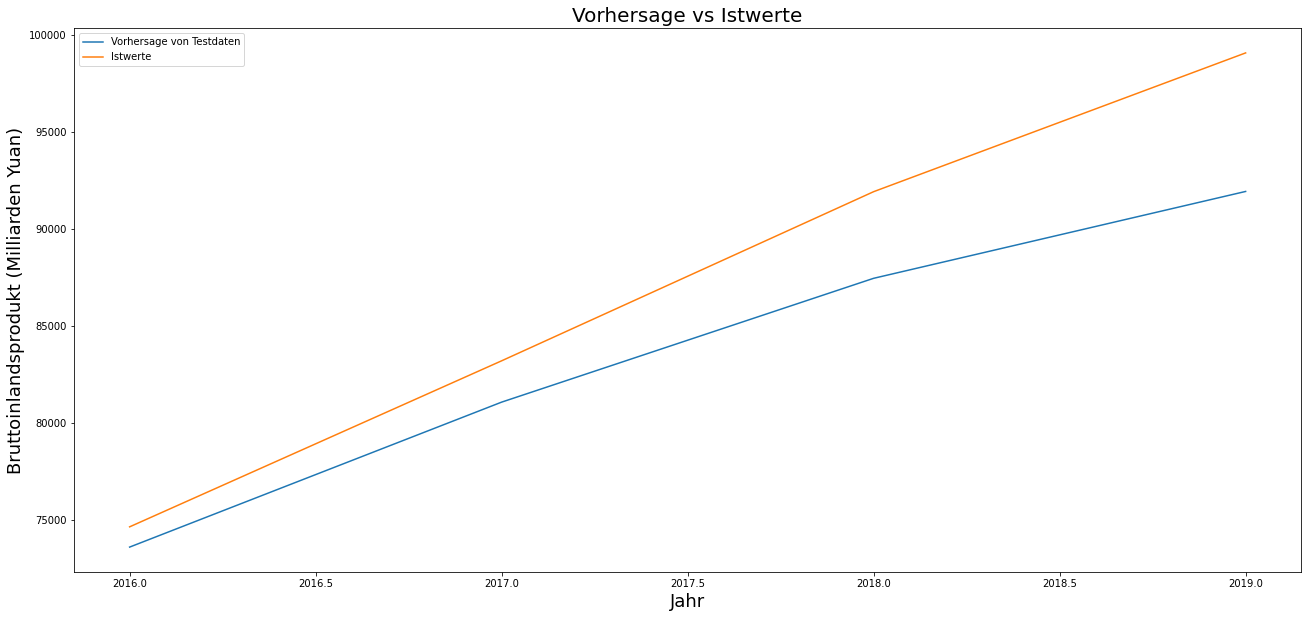

In [ ]:
# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10)) #, sharex=True)
plt.title("Vorhersage vs Istwerte", fontsize=20)
ax1.plot(predicted_test_df.iloc[:,-1], predicted_gdp)
ax1.plot(predicted_test_df.iloc[:,-1], actual_gdp)
plt.legend(["Vorhersage von Testdaten", "Istwerte"], loc="upper left")
plt.xlabel("Jahr", fontsize=18)
plt.ylabel("Bruttoinlandsprodukt (Milliarden Yuan)", fontsize=18)

plt.show()

**Make future predictions**

Predict the value of the next six years

**Deutsch:**

**Zukunftsprognosen erstellen**

Vorhersage des Wertes für die nächsten sechs Jahre

In [ ]:
# extract last three rows from dataset
temp_input=final_df[-3:].tolist()

In [ ]:
temp_input

[[0.9083244127092426,
  0.9391524313449705,
  0.8778505764506643,
  0.7635711140367123,
  0.8002841442059427,
  0.889555674298163,
  0.9363576976119619,
  0.9248228019906488,
  0.8216574498784509],
 [0.955666458845534,
  0.9495876120285202,
  0.9325820877707891,
  0.9136338588993295,
  0.8989394385343805,
  1.0,
  1.0,
  0.9647866083546983,
  0.9196213724686583],
 [1.0,
  0.9842836996763308,
  1.0000000000000002,
  0.9999999999999999,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9999999999999999]]

In [ ]:
predicted_consumption_output =[]
for i in range(6):
  # Get the last 3 year consumption values and scale the data to be values between 0 and 1
  last_5_years = np.array(temp_input[-3:])
  last_5_years_scaled = last_5_years.reshape(-1, n_input)
  # Create an empty list and Append past 5 years
  X_test_new = []
  X_test_new.append(last_5_years_scaled)
  # Convert the X_test data set to a numpy array and reshape the data
  prediction_consumption_scaled = model_2.predict(X_test_new)
  temp_input.extend(prediction_consumption_scaled.tolist())
  predicted_consumption_output.extend(prediction_consumption_scaled.tolist())
  

In [ ]:
# add new predicted values into temp_input list
temp_input

[[0.9083244127092426,
  0.9391524313449705,
  0.8778505764506643,
  0.7635711140367123,
  0.8002841442059427,
  0.889555674298163,
  0.9363576976119619,
  0.9248228019906488,
  0.8216574498784509],
 [0.955666458845534,
  0.9495876120285202,
  0.9325820877707891,
  0.9136338588993295,
  0.8989394385343805,
  1.0,
  1.0,
  0.9647866083546983,
  0.9196213724686583],
 [1.0,
  0.9842836996763308,
  1.0000000000000002,
  0.9999999999999999,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9999999999999999],
 [1.078506588935852,
  1.1015774011611938,
  1.0205378532409668,
  0.9203643798828125,
  0.9234514832496643,
  1.0344972610473633,
  1.146363377571106,
  0.9998195767402649,
  0.9665470719337463],
 [1.1785989999771118,
  1.2018059492111206,
  1.092320442199707,
  0.9590848684310913,
  0.9572893977165222,
  1.1494553089141846,
  1.2372668981552124,
  1.0539928674697876,
  1.0241411924362183],
 [1.2346689701080322,
  1.2788045406341553,
  1.1500025987625122,
  1.0262832641601562,
  1.0339741706848145,
  1.2

In [ ]:
# rename temp_input into prediction_arr
prediction_arr = np.array(temp_input)

In [ ]:
prediction_arr

array([[0.90832441, 0.93915243, 0.87785058, 0.76357111, 0.80028414,
        0.88955567, 0.9363577 , 0.9248228 , 0.82165745],
       [0.95566646, 0.94958761, 0.93258209, 0.91363386, 0.89893944,
        1.        , 1.        , 0.96478661, 0.91962137],
       [1.        , 0.9842837 , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.07850659, 1.1015774 , 1.02053785, 0.92036438, 0.92345148,
        1.03449726, 1.14636338, 0.99981958, 0.96654707],
       [1.178599  , 1.20180595, 1.09232044, 0.95908487, 0.9572894 ,
        1.14945531, 1.2372669 , 1.05399287, 1.02414119],
       [1.23466897, 1.27880454, 1.1500026 , 1.02628326, 1.03397417,
        1.21000767, 1.30263269, 1.11929154, 1.10877442],
       [1.24431801, 1.27036357, 1.17174733, 1.04654431, 1.04192543,
        1.20277071, 1.32264996, 1.12179983, 1.1031487 ],
       [1.29359603, 1.2918998 , 1.20505917, 1.04349816, 1.04819024,
        1.23014307, 1.37206793, 1.15911782, 1.1431067 ],


In [ ]:
# transform the predicted value back to original form
prediction_unscaled = scaler_prediction.inverse_transform(prediction_arr)

In [ ]:
predicted_consumption = prediction_unscaled.ravel()

In [ ]:
predicted_consumption

array([  3190.789     ,   1899.7842638 ,    632.53951563,    209.41927228,
          414.00076415,    700.273     ,   3064.9       ,   1390.08      ,
        83203.59      ,   3303.475     ,   1912.9999275 ,    657.07314703,
          245.92728745,    457.90272932,    775.509     ,   3196.42      ,
         1395.38      ,  91928.11      ,   3409.        ,   1956.94088451,
          687.29351129,    266.93887425,    502.87504711,    775.509     ,
         3196.42      ,   1400.05      ,  99086.51      ,   3595.86546533,
         2105.48782004,    696.49969086,    247.56472226,    468.81067846,
          799.00894819,   3498.88723792,   1400.02607227,  96107.24240581,
         3834.11062689,   2232.42254438,    728.67653992,    256.98483639,
          483.8686736 ,    877.3197499 ,   3686.74390838,   1407.21053408,
       101236.48838658,   3967.57128544,   2329.93762534,    754.53281054,
          273.33319822,    517.99367676,    918.56874322,   3821.82558444,
         1415.87044456, 1

In [ ]:
# reshape into proper format
predicted_consumption= predicted_consumption.reshape(-1,9)

In [ ]:
predicted_consumption.shape

(9, 9)

**Table of actual values from 2017 to 2019 & prediction values from 2020 to 2025**

**Deutsch:**

**Tabelle mit realen Werten zwischen 2017 und 2019 sowie Vorhersagewerten zwischen 2020 und 2025**

In [ ]:
# add column names and convert into dataframe for preparation of visualisation
prediction_df=pd.DataFrame(predicted_consumption ,columns=['total_energy_consumption_mtoe','coal_consumption_mtoe','oil_consumption_mtoe','gas_consumption_mtoe','non_fossil_consumption_mtoe','imports_mtoe', 'tpes_mtoe', 'population_million', 'gdp_billion_yuan'])
prediction_df

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan
0,3190.789000,1899.784264,632.539516,209.419272,414.000764,700.273000,3064.900000,1390.080000,83203.590000
1,3303.475000,1912.999927,657.073147,245.927287,457.902729,775.509000,3196.420000,1395.380000,91928.110000
2,3409.000000,1956.940885,687.293511,266.938874,502.875047,775.509000,3196.420000,1400.050000,99086.510000
3,3595.865465,2105.487820,696.499691,247.564722,468.810678,799.008948,3498.887238,1400.026072,96107.242406
4,3834.110627,2232.422544,728.676540,256.984836,483.868674,877.319750,3686.743908,1407.210534,101236.488387
5,3967.571285,2329.937625,754.532811,273.333198,517.993677,918.568743,3821.825584,1415.870445,108773.797004
6,3990.538428,2319.247534,764.279977,278.262408,521.532016,913.638841,3863.192266,1416.203093,108272.778393
7,4107.832536,2346.522153,779.212152,277.521324,524.319878,932.285221,3965.316977,1421.152205,111831.377952
8,4306.556120,2454.013828,801.896404,295.559332,555.358595,988.828865,4081.525876,1429.003600,119017.255859


**Preparation of predicted values for visualisation**

**Deutsch:**

**Aufbereitung der Vorhersagewerte für die Visualisierung**

In [ ]:
# Generate list of sequence of days for predictions
year_range = range(2017,2026)

yearlist_predict = []

for y in year_range:
  yearlist_predict.append(y)

In [ ]:
# Generate list of sequence of days for predictions
year_range = range(2000,2020)

yearlist_main = []

for y in year_range:
  yearlist_main.append(y)

In [ ]:
# preparation for combination it to original dataset copies
prediction_df['year']=yearlist_predict
prediction_df.head()

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
0,3190.789000,1899.784264,632.539516,209.419272,414.000764,700.273000,3064.900000,1390.080000,83203.590000,2017
1,3303.475000,1912.999927,657.073147,245.927287,457.902729,775.509000,3196.420000,1395.380000,91928.110000,2018
2,3409.000000,1956.940885,687.293511,266.938874,502.875047,775.509000,3196.420000,1400.050000,99086.510000,2019
3,3595.865465,2105.487820,696.499691,247.564722,468.810678,799.008948,3498.887238,1400.026072,96107.242406,2020
4,3834.110627,2232.422544,728.676540,256.984836,483.868674,877.319750,3686.743908,1407.210534,101236.488387,2021


In [ ]:
# make a copy from input_df and add a year column
energy_consumption_df = input_df.loc[:, :]
energy_consumption_df['year']=yearlist_main
energy_consumption_df.tail()

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
15,3038.791,1920.657806,589.578310,170.021712,342.370652,543.865,2991.43,1374.62,68885.82,2015
16,3090.444,1895.791743,604.765327,182.775362,377.626286,631.645,2970.86,1382.71,74639.51,2016
17,3190.789,1899.784264,632.539516,209.419272,414.000764,700.273,3064.90,1390.08,83203.59,2017
18,3303.475,1912.999927,657.073147,245.927287,457.902729,775.509,3196.42,1395.38,91928.11,2018
19,3409.000,1956.940885,687.293511,266.938874,502.875047,775.509,3196.42,1400.05,99086.51,2019


In [ ]:
target_df=prediction_df.iloc[5:,:]
target_df

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
5,3967.571285,2329.937625,754.532811,273.333198,517.993677,918.568743,3821.825584,1415.870445,108773.797004,2022
6,3990.538428,2319.247534,764.279977,278.262408,521.532016,913.638841,3863.192266,1416.203093,108272.778393,2023
7,4107.832536,2346.522153,779.212152,277.521324,524.319878,932.285221,3965.316977,1421.152205,111831.377952,2024
8,4306.556120,2454.013828,801.896404,295.559332,555.358595,988.828865,4081.525876,1429.003600,119017.255859,2025


In [ ]:
# this is the prediction dataframe between 2019 and 2025
visual_df=prediction_df.iloc[2:,:]
visual_df

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
2,3409.000000,1956.940885,687.293511,266.938874,502.875047,775.509000,3196.420000,1400.050000,99086.510000,2019
3,3595.865465,2105.487820,696.499691,247.564722,468.810678,799.008948,3498.887238,1400.026072,96107.242406,2020
4,3834.110627,2232.422544,728.676540,256.984836,483.868674,877.319750,3686.743908,1407.210534,101236.488387,2021
5,3967.571285,2329.937625,754.532811,273.333198,517.993677,918.568743,3821.825584,1415.870445,108773.797004,2022
6,3990.538428,2319.247534,764.279977,278.262408,521.532016,913.638841,3863.192266,1416.203093,108272.778393,2023
7,4107.832536,2346.522153,779.212152,277.521324,524.319878,932.285221,3965.316977,1421.152205,111831.377952,2024
8,4306.556120,2454.013828,801.896404,295.559332,555.358595,988.828865,4081.525876,1429.003600,119017.255859,2025


**Combination of original dataset and prediction table**

**Deutsch:**

**Zusammensetzung des originalen Datensatz und der Vorhersagetabelle**

In [ ]:
# append the predicted dataframe to the original dataset copies
combined_energy_consumption_df= pd.concat([energy_consumption_df, prediction_df.iloc[3:,:]], axis=0)
combined_energy_consumption_df.reset_index(drop=True, inplace=True)
combined_energy_consumption_df

,total_energy_consumption_mtoe,coal_consumption_mtoe,oil_consumption_mtoe,gas_consumption_mtoe,non_fossil_consumption_mtoe,imports_mtoe,tpes_mtoe,population_million,gdp_billion_yuan,year
0,1028.748000,710.392047,239.039282,23.653872,57.871406,100.289000,1129.870000,1267.430000,10028.010000,2000
1,1088.829000,749.393539,246.105247,26.212773,70.767404,94.297000,1168.300000,1276.270000,11086.310000,2001
2,1187.039000,819.385234,265.905076,27.610780,74.664252,110.383000,1245.800000,1284.530000,12171.740000,2002
3,1379.581000,976.928527,294.666253,30.876615,77.587512,140.336000,1419.640000,1292.270000,13742.200000,2003
4,1611.967000,1137.462753,344.207504,36.534898,95.419626,186.151000,1614.660000,1299.880000,16184.020000,2004
5,1829.583000,1331.468157,348.399466,42.551166,106.521667,187.761000,1781.420000,1307.560000,18731.890000,2005
6,2005.269000,1461.575517,374.328103,52.054572,116.180339,218.197000,1948.770000,1314.480000,21943.850000,2006
7,2180.094000,1591.652537,393.148254,63.329630,129.721449,244.328000,2097.550000,1321.290000,27009.230000,2007
8,2244.277000,1616.135032,399.181491,73.010343,167.889669,257.348000,2153.960000,1328.020000,31924.460000,2008
9,2352.882000,1692.937022,415.649790,80.065634,167.205705,331.191000,2296.880000,1334.500000,34851.770000,2009


**Visualise the prediction**

**Deutsch:**

**Visualisierung der Vorhersage** (Gesamtenergieverbrauch)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


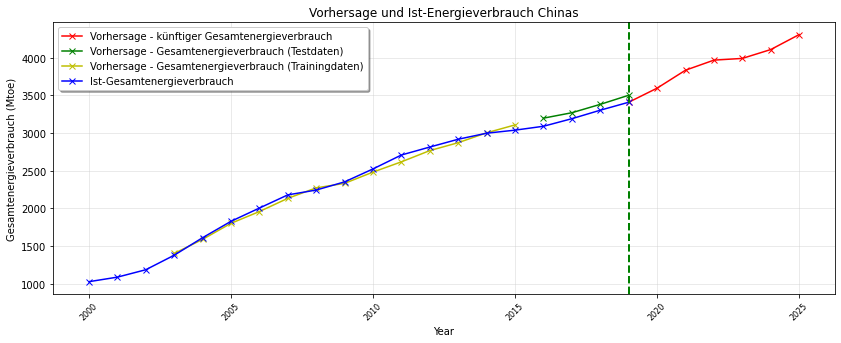

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

plt.plot(visual_df['year'], visual_df['total_energy_consumption_mtoe'], color='r', marker='x', label='Vorhersage - künftiger Gesamtenergieverbrauch')
plt.plot(predicted_test_df.iloc[:,-1], predicted_test_df.iloc[:,0], color='g', marker='x', label='Vorhersage - Gesamtenergieverbrauch (Testdaten)')
plt.plot(predicted_train_df.iloc[:,-1], predicted_train_df.iloc[:,0], color='y', marker='x', label='Vorhersage - Gesamtenergieverbrauch (Trainingdaten)')
#plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Energy_consumption'], color='orange', label='Training predictions')
#plt.plot(input_df.iloc[:,-1], input_df.iloc[:, 0], color='b', label='Actual Energy Consumption')
plt.plot(combined_energy_consumption_df.iloc[:20,-1], combined_energy_consumption_df.iloc[:20,0], color='b', marker='x', label='Ist-Gesamtenergieverbrauch')
plt.axvline(x = min(visual_df['year']), color='green', linewidth=2, linestyle='--')
#plt.axvline(x = min(target_df['year']), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Vorhersage und Ist-Energieverbrauch Chinas', family='Arial', fontsize=12)
plt.xlabel('Year', family='Arial', fontsize=10)
plt.ylabel('Gesamtenergieverbrauch (Mtoe)', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

**Deutsch:**

**Visualisierung der Vorhersage** (Kohleverbrauch)

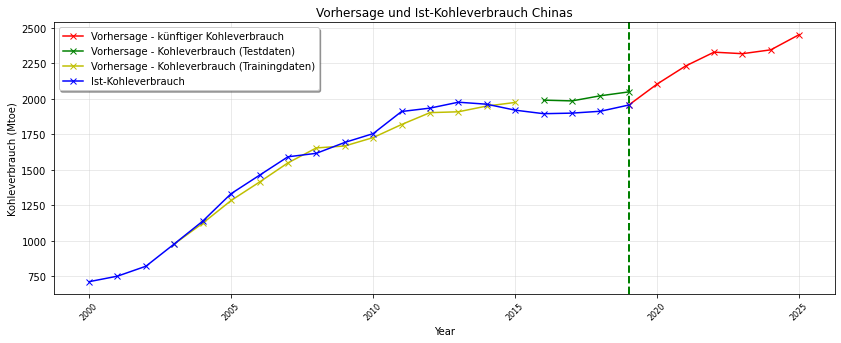

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

plt.plot(visual_df['year'], visual_df['coal_consumption_mtoe'], color='r', marker='x', label='Vorhersage - künftiger Kohleverbrauch')
plt.plot(predicted_test_df.iloc[:,-1], predicted_test_df.iloc[:,1], color='g', marker='x', label='Vorhersage - Kohleverbrauch (Testdaten)')
plt.plot(predicted_train_df.iloc[:,-1], predicted_train_df.iloc[:,1], color='y', marker='x', label='Vorhersage - Kohleverbrauch (Trainingdaten)')

plt.plot(combined_energy_consumption_df.iloc[:20,-1], combined_energy_consumption_df.iloc[:20,1], color='b', marker='x', label='Ist-Kohleverbrauch')
plt.axvline(x = min(visual_df['year']), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Vorhersage und Ist-Kohleverbrauch Chinas', family='Arial', fontsize=12)
plt.xlabel('Year', family='Arial', fontsize=10)
plt.ylabel('Kohleverbrauch (Mtoe)', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

**Deutsch:**

**Visualisierung der Vorhersage** (Erdölverbrauch)

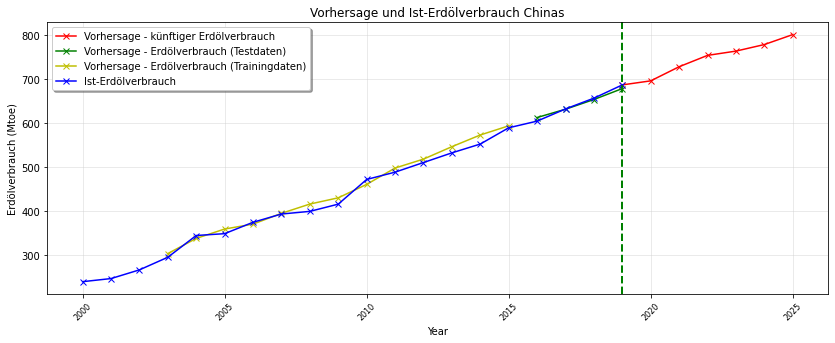

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

plt.plot(visual_df['year'], visual_df['oil_consumption_mtoe'], color='r', marker='x', label='Vorhersage - künftiger Erdölverbrauch')
plt.plot(predicted_test_df.iloc[:,-1], predicted_test_df.iloc[:,2], color='g', marker='x', label='Vorhersage - Erdölverbrauch (Testdaten)')
plt.plot(predicted_train_df.iloc[:,-1], predicted_train_df.iloc[:,2], color='y', marker='x', label='Vorhersage - Erdölverbrauch (Trainingdaten)')

plt.plot(combined_energy_consumption_df.iloc[:20,-1], combined_energy_consumption_df.iloc[:20,2], color='b', marker='x', label='Ist-Erdölverbrauch')
plt.axvline(x = min(visual_df['year']), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Vorhersage und Ist-Erdölverbrauch Chinas', family='Arial', fontsize=12)
plt.xlabel('Year', family='Arial', fontsize=10)
plt.ylabel('Erdölverbrauch (Mtoe)', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

**Deutsch:**

**Visualisierung der Vorhersage** (Erdgasverbrauch)

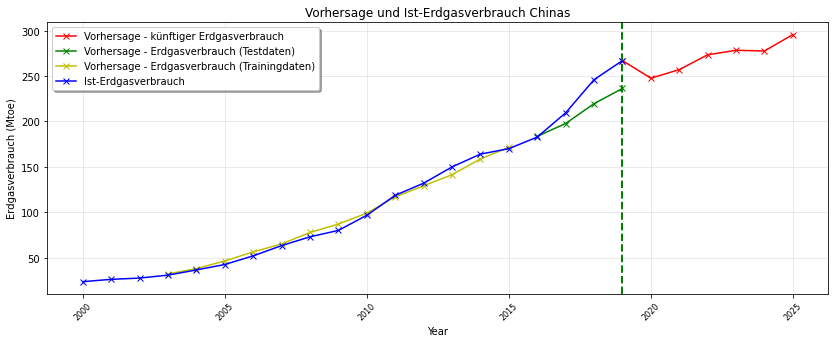

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

plt.plot(visual_df['year'], visual_df['gas_consumption_mtoe'], color='r', marker='x', label='Vorhersage - künftiger Erdgasverbrauch')
plt.plot(predicted_test_df.iloc[:,-1], predicted_test_df.iloc[:,3], color='g', marker='x', label='Vorhersage - Erdgasverbrauch (Testdaten)')
plt.plot(predicted_train_df.iloc[:,-1], predicted_train_df.iloc[:,3], color='y', marker='x', label='Vorhersage - Erdgasverbrauch (Trainingdaten)')

plt.plot(combined_energy_consumption_df.iloc[:20,-1], combined_energy_consumption_df.iloc[:20,3], color='b', marker='x', label='Ist-Erdgasverbrauch')
plt.axvline(x = min(visual_df['year']), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Vorhersage und Ist-Erdgasverbrauch Chinas', family='Arial', fontsize=12)
plt.xlabel('Year', family='Arial', fontsize=10)
plt.ylabel('Erdgasverbrauch (Mtoe)', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

**Deutsch:**

**Visualisierung der Vorhersage** (Nichtfossiler Energieverbrauch)

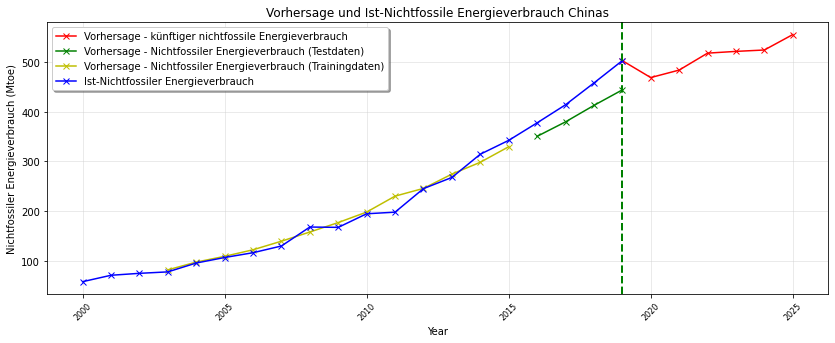

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

plt.plot(visual_df['year'], visual_df['non_fossil_consumption_mtoe'], color='r', marker='x', label='Vorhersage - künftiger nichtfossile Energieverbrauch')
plt.plot(predicted_test_df.iloc[:,-1], predicted_test_df.iloc[:,4], color='g', marker='x', label='Vorhersage - Nichtfossiler Energieverbrauch (Testdaten)')
plt.plot(predicted_train_df.iloc[:,-1], predicted_train_df.iloc[:,4], color='y', marker='x', label='Vorhersage - Nichtfossiler Energieverbrauch (Trainingdaten)')

plt.plot(combined_energy_consumption_df.iloc[:20,-1], combined_energy_consumption_df.iloc[:20,4], color='b', marker='x', label='Ist-Nichtfossiler Energieverbrauch')
plt.axvline(x = min(visual_df['year']), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Vorhersage und Ist-Nichtfossile Energieverbrauch Chinas', family='Arial', fontsize=12)
plt.xlabel('Year', family='Arial', fontsize=10)
plt.ylabel('Nichtfossiler Energieverbrauch (Mtoe)', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()